In [15]:
import numpy as np
from pykeen.triples import TriplesFactory
from pykeen.evaluation import RankBasedEvaluator

import torch

# Replace these lists with your actual triples data
triples = [('salt tolerance', 'Jasmonate ( JA ) signaling', 'inhibits'), ('HvOPR2', 'opda reductase3', 'activates'), ('OPR3', 'CK', 'inhibits'), ('grape genotypes', 'AGC kinase', 'interacts'), ('opda reductase3', 'AGC kinase', 'interacts'), ('free salicylic acid', 'AGC kinase', 'interacts'), ('rice', 'AGC kinase', 'interacts'), ('WSNLKKVILLKRFVKSL', 'BAP', 'inhibits'), ('LOC_Os09g02650', 'fatty acids', 'activates'), ('LOC_Os09g02650', 'GUS', 'activates'), ('LOC_Os09g02650', 'GID1 molecule', 'activates'), ('LOC_Os09g02650', 'AaGSW1', 'activates'), ('fatty acids', 'AaMYC2/AabZIP1', 'is-in'), ('GUS', 'AaMYC2/AabZIP1', 'is-in'), ('GID1 molecule', 'AaMYC2/AabZIP1', 'is-in'), ('AaGSW1', 'AaMYC2/AabZIP1', 'is-in'), ('LOC_Os09g02650', 'caterpillars', 'activates'), ('LOC_Os09g02650', 'JA', 'activates'), ('LOC_Os09g02650', ',', 'activates'), ('growth and', 'rice', 'interacts'), ('growth and', 'induce', 'interacts'), ('barley', '2-hydroxyethyl jasmonate', 'inhibits'), ('grapevine', 'of soybean', 'is-in'), ('binding proteins', 'Fol susceptibility', 'interacts'), ('Vitis genotypes', 'Fol susceptibility', 'interacts'), ('HvOPR2', 'OsCDPK1', 'interacts'), ('lipase action', 'G. barbadense', 'interacts'), ('lipase action', 'ISR', 'interacts'), ('lipase action', 'nicotine biosynthesis', 'interacts'), ('hybrid rice grain', 'jasmonic acid', 'activates'), ('GID1-SLR1 interaction', 'jasmonic acid', 'activates'), ('JAs', 'jasmonic acid', 'activates'), ('SA', 'found', 'is-in'), ('SA', 'fungal-infected opr3', 'inhibits'), ('SA', 'BPH-induced JA , jasmonoyl-isoleucine ( JA-Ile ) , and H(2)O(2 )', 'activates'), ('SA', '', 'inhibits'), ('corn seeds', 'most of', 'inhibits'), ('corn seeds', 'rbohDF mutants', 'inhibits'), ('among', 'tannin', 'is-in'), ('among', 'JA , ethylene , and H(2)O(2 ) pathways', 'interacts'), ('among', 'CaMV infection', 'is-in'), ('tannin', ' ', 'interacts'), ('13(S)-hydroperoxolinolenic acid', 'wheat', 'produces'), ('cerato-platanin protein', 'wheat', 'produces'), ('12-Oxo-phytodienoic acid', 'wheat', 'produces'), ('oxylipins', 'oat cultivars', 'is-in'), ('LSW17S', 'E. salsugineum water-treated leaves', 'is-in'), ('vascular tissue', 'cell death program', 'interacts'), ('acetylcholinesterase', 'allow for metabolite and', 'interacts'), ('acetylcholinesterase', 'salt', 'interacts'), ('evident in', 'HvOPR2', 'inhibits'), ('MPO', 'jasmonic acid', 'interacts'), ('Ca2 + chelator', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('GA3', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('salicylic acid', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('SA', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('IAA', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('ADP-GLUCOSE PYROPHOSPHORYLASE LARGE SUBUNIT2', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('N-methylputrescine', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('SA', 'MYC2', 'interacts'), ('GA3', 'tobacco roots', 'interacts'), ('tobacco roots', 'AhBBI transcripts', 'interacts'), ('tobacco roots', 'ET', 'interacts'), ('tobacco roots', 'gibberellic acid (GA)-induced expression', 'interacts'), ('LSW17S', 'OXI1', 'interacts'), ('IAA', 'plant-specific hydrophilic transcriptional factor', 'is-in'), ('sesquiterpene lactone', 'plant-specific hydrophilic transcriptional factor', 'is-in'), ('PR2', 'methyl jasmonate', 'is-in'), ('aos', 'PLA2 activation', 'is-in'), ('ginsenosides', 'PLA2 activation', 'is-in'), ('OsCDPK1', 'PLA2 activation', 'is-in'), ('ethylene pathway', 'anthocyanin-free cells', 'inhibits'), ('anthocyanin-free cells', 'jasmonic acid metabolism', 'interacts'), ('anthocyanin-free cells', 'G. barbadense', 'interacts'), ('LOC_Os09g02650', ', heat shock protein', 'interacts'), ('LOC_Os09g02650', 'Jekyll', 'interacts'), ('LOC_Os09g02650', '', 'interacts'), ('BRs', 'NDO-2', 'interacts'), ('Oxophytodienoate reductases', 'Aux/IAA', 'inhibits'), ('found', 'JA', 'is-in'), ('', 'ribosylated forms', 'interacts'), ('ribosylated forms', 'Ri-1', 'interacts'), ('AaMYC2/AabZIP1', 'jasmonate signaling', 'interacts'), ('AaMYC2/AabZIP1', 'Arabidopsis thaliana resistance', 'interacts'), ('Arabidopsis thaliana resistance', 'jasmonate signaling', 'inhibits'), ('SA-dependent , NPR1-independent host responses', 'Arabidopsis thaliana resistance', 'interacts'), ('Puccinia graminis f. sp. tritici', 'Fusarium head blight', 'produces'), ('Puccinia graminis f. sp. tritici', 'TIR-NBS-LRR', 'inhibits'), ('gs9 - 1', 'most of', 'is-in'), ('uidA', 'elicitor-induced NO generation and JA accumulation', 'inhibits'), ('nsLTPs mRNA accumulation', 'elicitor-induced NO generation and JA accumulation', 'inhibits'), ('uidA', 'SRD1 promoter activity', 'inhibits'), ('nsLTPs mRNA accumulation', 'SRD1 promoter activity', 'inhibits'), ('rice', 'Aux/IAA and ARF genes', 'interacts'), ('IAA', 'Aux/IAA and ARF genes', 'interacts'), ('JAs', 'elicitor-induced NO generation and JA biosynthesis', 'inhibits'), ('infectious CaMV DNA', 'elicitor-induced NO generation and JA biosynthesis', 'inhibits'), ('ET', 'Xoo', 'interacts'), ('ROS', 'melatonin-mediated flowering', 'activates'), ('P450 - 3', 'Sodium-nitroprusside-induced hypericin production', 'inhibits'), ('hormone treatments', 'NO-induced hypericin production', 'interacts'), ('gibberellin-induced growth', 'H. perforatum cells', 'is-in'), ('JA biosynthesis', 'H. perforatum cells', 'is-in'), ('elicitor-induced NO generation', 'H. perforatum cells', 'is-in'), ('acid', 'GA1 ) and', 'interacts'), ('acid', '35S : HvTPR', 'interacts'), ('35S : HvTPR', 'GA1 ) and', 'interacts'), ('elicitor-induced NO generation', 'JA biosynthesis', 'interacts'), ('JA biosynthesis', 'gibberellin-induced growth', 'interacts'), ('elicitor-induced NO generation', 'gibberellin-induced growth', 'interacts'), ('mitogen-activated protein ( MAP ) kinases', 'alpha-linolenic acid', 'is-in'), ('CO2', 'oxylipin production', 'inhibits'), ('GA(3 )', 'sly1', 'activates'), ('ISR', 'sly1', 'activates'), ('NtPat1', 'sly1', 'activates'), ('NtPat2', 'sly1', 'activates'), ('anthocyanin-free cells', 'HvOPR2 gene', 'is-in'), ('acid', 'significant increase in alanine aminotransferase ( ALT ) and aspartate transaminase (', 'activates'), ('acid', 'significant increment', 'activates'), ('acid', 'rice', 'activates'), ('acid', 'induce', 'activates'), ('acid', 'significant decrements in superoxide dismutase ( SOD ) , catalase ( CAT ) , and glutathione peroxidase ( GPx', 'inhibits'), ('toxicity', 'use of NsL.oil', 'inhibits'), ('Auxin', 'Cucumis sativus L.', 'interacts'), ('ABA', 'Cucumis sativus L.', 'interacts'), ('GbaNA1', 'ADA activity', 'is-in'), ('Botrytis cinerea strain 2100 infection', 'MoSM1', 'is-in'), ('salt', 'OPDA', 'interacts'), ('ginsenosides', 'OPDA', 'interacts'), ('ginsenosides', 'CK', 'interacts'), ('salt', 'CK', 'interacts'), ('ginsenosides', 'GA', 'interacts'), ('salt', 'GA', 'interacts'), ('TOPLESS', 'ethylene', 'activates'), ('TOPLESS', 'ethylene', 'activates'), ('GA', 'ethylene', 'inhibits'), ('GA', 'ethylene', 'inhibits'), ('phosphatidylcholine', 'JA and salicylic acid ( SA ) responses', 'is-in'), ('salicylic', 'JA and salicylic acid ( SA ) responses', 'is-in'), ('BRs', 'JA and salicylic acid ( SA ) responses', 'is-in'), ('NPR1', 'JA and salicylic acid ( SA ) responses', 'is-in'), ('aphids', 'JA and salicylic acid ( SA ) responses', 'is-in'), ('barley defense/response', ') showed the', 'is-in'), ('hydrogen peroxide', 'gul3 - 1D', 'inhibits'), ('BR', 'GA4', 'interacts'), ('immunohistochemical', 'desaturase gene', 'inhibits'), ('immunohistochemical', 'DWF4 expression', 'inhibits'), ('Auxin', '2-hydroxyethyl jasmonate', 'inhibits'), ('2-hydroxyethyl jasmonate', 'sesquiterpene lactone', 'is-in'), ('Auxin', 'jasmonoyl-L-isoleucine', 'activates'), ('Auxin', 'MPO', 'activates'), ('ABA', 'trichome-specific transcription factors', 'inhibits'), ('trichome-specific transcription factors', 'B. cinerea infection', 'is-in'), ('', 'JA', 'inhibits'), (',', 'CaMV infection', 'inhibits'), ('ROS', 'Cd-induced toxicity symptoms , growth inhibition , and photosynthesis disturbances', 'inhibits'), ('to', 'NaCl is', 'inhibits'), ('to', 'contents', 'interacts'), ('to', 'well', 'interacts'), ('NaCl is', 'of Cd', 'is-in'), ('cyanidin', 'maize insect resistance 1-cysteine protease', 'interacts'), ('cyanidin', 'LSW17S', 'interacts'), ('AGC kinase', 'auxin', 'activates'), ('GbaNA1', 'rhizome formation', 'interacts'), ('BES1', '2alpha-hydroxylated compound GA40', 'is-in'), ('pPLAIIα', '2alpha-hydroxylated compound GA40', 'is-in'), ('BES1', 'Mir1-CP accumulation', 'interacts'), ('BES1', 'mir1 transcript expression', 'interacts'), ('SA', 'Fusarium wilt', 'is-in'), ('rice pathogenesis-related protein OsPR10a', 'Fusarium wilt', 'is-in'), ('auxin', 'Arabidopsis', 'is-in'), ('bacterial two-component response regulators', 'Arabidopsis ecotype Col-0', 'is-in'), ('allene oxides', 'evident in', 'activates'), ('CK', 'evident in', 'activates'), ('aos', 'abscisic acid', 'interacts'), ('Auxin', 'Arabidopsis thaliana wound and defence responses , pollen development , and stress-related growth inhibition', 'interacts'), ('ABA', 'Arabidopsis thaliana wound and defence responses , pollen development , and stress-related growth inhibition', 'interacts'), ('methyl jasmonate', 'auxin', 'interacts'), ('methyl jasmonate', 'ethylene production', 'interacts'), ('methyl jasmonate', 'Panax notoginseng', 'produces'), ('auxin', 'Panax notoginseng', 'produces'), ('ethylene production', 'Panax notoginseng', 'produces'), ('tobacco leaves', 'myeloperoxidase', 'interacts'), ('12-oxophytodienoic and jasmonic acids', 'MPO1 protein', 'interacts'), ('SLR1', 'UGRdGT', 'interacts'), ('leucine-rich repeat domains', 'fungal-infected opr3', 'interacts'), ('or', 'and', 'interacts'), ('Ri-1', 'Fatty acids', 'interacts'), ('Ri-1', 'rust resistance', 'interacts'), ('SA', '', 'produces'), ('GUS', 'UDP-GLUCOSYL TRANSFERASE 74B1', 'interacts'), ('GUS', 'activated around 12 hai', 'produces'), ('lipase action', 'methyl jasmonate', 'inhibits'), ('lipase action', 'cabbage loopers', 'inhibits'), ('S. exigua', 'TIFY family genes', 'activates'), ('S. exigua', ', cis-5-caffeoylquinic', 'activates'), ('salicylic acid and jasmonic acid ( JA ) signaling pathways', 'G. barbadense', 'interacts'), ('G. barbadense', 'salicylic acid', 'inhibits'), ('salicylic acid', 'salicylic acid or jasmonic acid mediated-defence response', 'inhibits'), ('salicylic acid', 'gene', 'activates'), ('salicylic acid', 'JEKYLL', 'activates'), ('salicylic acid', 'OsCDPK1', 'activates'), ('salicylic acid', 'phytohormone jasmonate', 'interacts'), ('salicylic acid', 'protein )', 'interacts'), ('NO(2)-triggered B. cinerea resistance', 'SRD1 promoter', 'interacts'), ('NO(2)-triggered B. cinerea resistance', 'amino acid metabolism', 'interacts'), ('NO(2)-triggered B. cinerea resistance', 'HvOPR2', 'interacts'), ('NO(2)-triggered B. cinerea resistance', 'MJA', 'interacts'), ('NO(2)-triggered B. cinerea resistance', 'rbohDF mutants', 'interacts'), ('opda reductase3', 'JA- and NO-related biosynthetic and signaling component genes', 'activates'), ('blast disease', 'nicotine biosynthesis', 'interacts'), ('SA', 'blast disease', 'inhibits'), ('JA production', 'blast disease', 'inhibits'), ('AaGSW1', 'blast disease', 'inhibits'), ('Hai 7124', 'fatty acid chain', 'inhibits'), ('NtPat2', 'JA-dependent RKN defense pathway', 'interacts'), ('jasmonate', 'protease inhibitor 2 ( PI2 ) gene expression', 'activates'), ('HEJA', 'protease inhibitor 2 ( PI2 ) gene expression', 'activates'), ('GID1 molecule', 'MTF ETHYLENE RESPONSE FACTOR.C3', 'interacts'), ('MTF ETHYLENE RESPONSE FACTOR.C3', ',', 'inhibits'), ('Artemisia annua', 'MoSM1', 'is-in'), ('', 'rice pathogenesis-related 10', 'interacts'), ('', 'jasmonate ( JA ) biosynthesis and signaling', 'interacts'), ('', 'lipid metabolism', 'interacts'), ('DIR1 ,', 'PLA2 activity', 'interacts'), ('foolish-seedling disease', 'PLA2 activity', 'interacts'), ('ABA', 'N-methylputrescine', 'is-in'), ('ABA', 'ch1 mutant', 'interacts'), ('SRD1', 'Adenosine deaminase', 'interacts'), ('HvOPR2', 'Adenosine deaminase', 'interacts'), ('gibberellic acid effect', 'Adenosine deaminase', 'interacts'), ('HvOPR2', 'AGC kinase', 'interacts'), ('gibberellic acid effect', 'AGC kinase', 'interacts'), ('SRD1', 'AGC kinase', 'interacts'), ('aos', 'abscisic acid', 'is-in'), ('nicotine biosynthetic genes', 'aglycone [17,17 - 2H2]GA20', 'interacts'), ('MYC2-targeted JA-responsive genes', 'auxin', 'interacts'), ('jasmonic acid', 'class III plant peroxidases', 'is-in'), ('GA3', 'jasmonic acid', 'is-in'), ('bes1- D', 'AabZIP1', 'is-in'), ('bes1- D', 'wheatgrass', 'is-in'), ('ET', 'Summer black', 'is-in'), ('Oxophytodienoate reductases', 'HEJA', 'produces'), ('Oxophytodienoate reductases', 'phytohormones', 'produces'), ('HEJA', 'Cauliflower mosaic virus', 'inhibits'), ('phytohormones', 'Cauliflower mosaic virus', 'inhibits'), ('GID1-GA complex', 'salt', 'is-in'), ('GID1-GA complex', 'SLENDER RICE1', 'interacts'), ('jasmonic acid', 'gibberellic acid effect', 'is-in'), ('fatty acid chain', 'jasmonic acid', 'activates'), ('fatty acid chain', 'ZIM genes', 'activates'), ('fatty acid chain', 'jasmonic acid', 'inhibits'), ('dihybrid rice Ri-1/OsPR10a-Ox', 'GbaNA1', 'produces'), ('dihybrid rice Ri-1/OsPR10a-Ox', 'NtPat1', 'produces'), ('HEJA', 'ethylene pathway', 'interacts'), ('HEJA', 'rust resistance', 'interacts'), ('ethylene pathway', 'rust resistance', 'interacts'), ('HEJA', 'pPLAIIα', 'is-in'), ('ethylene pathway', 'pPLAIIα', 'is-in'), ('rust resistance', 'pPLAIIα', 'is-in'), ('SA/JA biosynthesis', 'melatonin-mediated flowering', 'activates'), ('melatonin-mediated flowering', 'SLR1 interaction', 'inhibits'), ('α-ocimene', 'pathways dependent', 'activates'), ('pathways dependent', 'salicylic', 'is-in'), ('pathways dependent', 'SRD1 promoter', 'inhibits'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'Arabidopsis seedlings', 'activates'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'BChE', 'activates'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'wheat', 'activates'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'barley', 'activates'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'rhizome formation', 'activates'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'myeloperoxidase', 'inhibits'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'opr3', 'activates'), ('white-backed planthopper ( WBPH ) Sogatella furcifera gravid females', 'ISR', 'activates'), ('Arabidopsis seedlings', 'MPO', 'is-in'), ('BChE', 'MPO', 'is-in'), ('wheat', 'MPO', 'is-in'), ('barley', 'MPO', 'is-in'), ('rhizome formation', 'MPO', 'is-in'), ('NBS-LRR genes', 'ROS', 'activates'), ('ginsenosides', 'GA3', 'is-in'), ('TMV', 'GA3', 'is-in'), ('oxi1', 'GA3', 'is-in'), ('transgenic Arabidopsis', 'GA3', 'is-in'), ('brown planthopper Nilaparvata lugens gravid females', 'SA', 'interacts'), ('NtPat2', 'WBPH female adults', 'inhibits'), ('NtPat1', 'WBPH female adults', 'inhibits'), ('ISR', 'WBPH female adults', 'inhibits'), ('WSNLKKVILLKRFVKSL', 'WBPH female adults', 'inhibits'), ('WBPH- or BPH-induced biosynthesis', 'SA', 'produces'), ('', 'AaGSW1', 'inhibits'), ('WBPH- or BPH-induced biosynthesis', 'ROS', 'is-in'), ('AaGSW1', 'CYP71AV1', 'interacts'), ('monogalloyl glucose tannins', 'N signaling', 'interacts'), ('monogalloyl glucose tannins', 'formation of', 'interacts'), ('G. barbadense', 'CK', 'interacts'), ('ISR', 'CK', 'interacts'), ('SA-deficient mutant plants', 'G. barbadense', 'interacts'), ('ethylene', 'ISR', 'interacts'), ('SA-deficient mutant plants', 'ISR', 'interacts'), ('ethylene', 'G. barbadense', 'interacts'), ('water', 'MJA', 'is-in'), ('TMV', 'MJA', 'is-in'), ('ginsenosides', 'MJA', 'is-in'), ('ginsenosides', 'B. cinerea', 'is-in'), ('TMV', 'B. cinerea', 'is-in'), ('water', 'B. cinerea', 'is-in'), ('jasmonic acid and ethylene signaling', 'S. exigua', 'interacts'), ('GA3', 'dihydroartemisinic acid', 'interacts'), ('AabZIP1', 'dihydroartemisinic acid', 'interacts'), ('AhBBI transcripts', '( A. thaliana ) allene oxide synthase', 'inhibits'), ('for', 'Fol susceptibility', 'interacts'), ('for', 'ULGCS cotyledons', 'interacts'), ('35S : HvTPR', 'for', 'interacts'), ('the', 'CW integrity maintenance', 'interacts'), ('changed', 'CW integrity maintenance', 'interacts'), ('ROS', 'CW integrity maintenance', 'interacts'), ('wheat', 'MeJA', 'is-in'), ('wheat', 'jasmonic acid', 'is-in'), ('GA', 'salicylic acid', 'interacts'), ('GA', 'SA', 'interacts'), ('GA', '', 'interacts'), ('GA', 'aos', 'interacts'), ('vegetative', 'Aux/IAA and ARF genes', 'is-in'), ('JA', 'BAP', 'interacts'), ('JA', 'MYC2', 'interacts'), ('JA', 'AabZIP1', 'interacts'), ('JA', 'MoSM1-OE plants', 'interacts'), ('JA', 'JA', 'interacts'), ('JA', 'SA', 'interacts'), ('JA', 'OsCDPK1', 'interacts'), ('BAP', 'oxygenated fatty acids', 'is-in'), ('MYC2', 'oxygenated fatty acids', 'is-in'), ('AabZIP1', 'genetic resource distinct', 'is-in'), ('MoSM1-OE plants', 'structure analysis ,', 'is-in'), ('JA', 'jasmonic acid metabolism', 'is-in'), ('SA', 'jasmonic acid metabolism', 'is-in'), ('OsCDPK1', '', 'is-in'), ('ZmCLA4 regulatory network', 'AaMYC2/AabZIP1', 'is-in'), ('rhizospheric bacterial isolate SBP-9', 'Chinese cabbage', 'interacts'), ('trienoic acids', 'myeloperoxidase', 'interacts'), ('', 'NtPat2', 'activates'), ('Stenotrophomonas maltophilia SBP-9', 'wheat growth', 'activates'), ('Stenotrophomonas maltophilia SBP-9', 'water', 'interacts'), ('GA3', 'oxylipins', 'inhibits'), ('butrylcholinesterase', 'microRNA156 (miR156)-targeted SQUAMOSA PROMOTER BINDING-LIKE ( SPL ) transcription factors', 'interacts'), ('microRNA156 (miR156)-targeted SQUAMOSA PROMOTER BINDING-LIKE ( SPL ) transcription factors', 'pathogenesis-related ( PR ) proteins', 'activates'), ('ISR', 'opr3', 'interacts'), ('opr3', 'nicotine biosynthetic genes', 'inhibits'), ('opr3', 'ethylene', 'inhibits'), ('opr3', 'MADS box genes', 'inhibits'), ('opr3', 'rice innate immunity', 'inhibits'), ('flavin-dependent oxidoreductases', 'Aux/IAA', 'is-in'), ('ET', 'TOPLESS', 'activates'), ('OPDA', 'OPR', 'activates'), ('SLR1', 'OPR', 'activates'), ('SA', 'OPR', 'activates'), ('HEJA', 'SA', 'activates'), ('LSW17S', 'SA', 'activates'), ('tomato', 'GH19 endochitinase protein', 'produces'), ('GH19 endochitinase protein', 'Gy 3', 'is-in'), ('GH19 endochitinase protein', 'membrane lipids', 'is-in'), ('allene oxides', 'CoA ligase', 'activates'), ('phospholipase A2', 'CoA ligase', 'activates'), ('Wistar albino rats', 'CoA ligase', 'activates'), ('Empoasca ( Matsumurasca ) onukii', 'CoA ligase', 'activates'), ('G. barbadense', 'CoA ligase', 'activates'), ('phosphatidic acid', 'CoA ligase', 'activates'), ('PA', 'CoA ligase', 'activates'), ('G. barbadense', 'CoA ligase', 'activates'), ('NtPat2', 'MoSM1-OE plants', 'inhibits'), ('hydrogen peroxide', 'opr3', 'activates'), ('hydrogen peroxide', 'JA signaling', 'activates'), ('JA accumulation', 'opr3', 'activates'), ('JA accumulation', 'JA signaling', 'activates'), ('JA accumulation', 'hydrogen peroxide', 'interacts'), ('OsEDR1-suppressing/knockout ( KO ) plants', 'Xanthomonas oryzae pv . oryzae', 'inhibits'), ('OsEDR1-suppressing/knockout ( KO ) plants', 'rats', 'inhibits'), ('Xanthomonas oryzae pv . oryzae', 'cyclopentenone 12-oxo-10,15(Z)-phytodienoic acid', 'produces'), ('rats', 'cyclopentenone 12-oxo-10,15(Z)-phytodienoic acid', 'produces'), ('ISR', 'pinene', 'produces'), ('G. barbadense', 'pinene', 'produces'), ('Hai 7124', 'oxi1', 'inhibits'), ('ACC synthase ( ACS ) gene family ,', 'JAs', 'interacts'), ('ACC synthase ( ACS ) gene family ,', 'ethylene perception', 'is-in'), ('GA(3 )', 'NtPat2', 'interacts'), ('NtPat3', 'SA and JA biosynthesis', 'inhibits'), ('SA and JA biosynthesis', 'anthocyanin-free cells', 'is-in'), ('BES1', 'ribosylated forms', 'inhibits'), ('BES1', 'JA-insensitive coi1 - 16 mutant', 'activates'), ('JA-insensitive coi1 - 16 mutant', 'tolerance and', 'is-in'), ('PGRs', 'cereal sexual reproduction', 'is-in'), ('of', 'SA- and JA-associated defence signalling', 'inhibits'), ('MoSM1', 'of', 'activates'), ('MoSM1', 'foolish-seedling disease', 'is-in'), ('tobacco MPO1', 'oat cultivars', 'is-in'), ('gibberellic acid effect', 'Merlot', 'activates'), ('Merlot', 'PR1', 'is-in'), ('Merlot', 'tobacco leaves', 'is-in'), ('Merlot', 'tobacco mosaic virus', 'inhibits'), ('Merlot', 'NBS-LRR genes', 'inhibits'), ('SA-independent but jasmonic acid/ethylene-modulated signal transduction pathway', 'Diethyldithiocarbamic acid', 'interacts'), (', and', 'ethylene perception', 'activates'), ('SA-deficient mutant', '', 'activates'), ('SA-deficient mutant', 'the early phenylpropanoid', 'activates'), ('Jekyll', '', 'activates'), ('Jekyll', 'the early phenylpropanoid', 'activates'), ('SA', 'levels of the', 'inhibits'), ('GUS', 'cereal sexual reproduction', 'inhibits'), ('combination of factors', 'ULGCS cotton', 'activates'), ('combination of factors', 'SA-responsive gene expression', 'interacts'), ('', ' ', 'is-in'), ('maize', 'Maize ( Zea mays L. ) suspension-cultured cells', 'is-in'), ('', 'helix-loop-helix family ,', 'is-in'), ('helix-loop-helix family ,', 'highly branched and cross-linked arabinoxylans', 'activates'), ('helix-loop-helix family ,', 'phospholipase A2', 'activates'), ('helix-loop-helix family ,', 'PLA2', 'activates'), ('helix-loop-helix family ,', 'salicylic acid', 'activates'), ('T. urticae HIPVs', 'the responsive', 'activates'), ('ethylene perception', 'cellulose-deficient cell walls', 'is-in'), ('AhBBI transcripts', 'ET', 'is-in'), ('abscisic acid', 'bean leaves', 'interacts'), ('JA', 'wound-induced proteinase inhibitor ( pin ) expression', 'inhibits'), ('SA-deficient mutant', 'wound-induced proteinase inhibitor ( pin ) expression', 'inhibits'), ('Jekyll', 'wound-induced proteinase inhibitor ( pin ) expression', 'inhibits'), ('rhizome formation', 'N- and other R-gene-mediated defense', 'inhibits'), ('NtPat genes', 'G. hirsutum', 'activates'), ('H(2)O(2 ) accumulation', 'protein kinases', 'is-in'), ('Auxin', 'Streptomyces sp. ZX01', 'is-in'), ('salt tolerance', 'maize', 'inhibits'), ('maize', 'Ilyonectria mors-panacis', 'interacts'), ('Ca(2 + ) influx', 'NBS-LRR genes', 'is-in'), ('Arabidopsis seedlings', 'NBS-LRR genes', 'is-in'), ('grape genotypes', 'NBS-LRR genes', 'is-in'), ('CORONITINE INSENSITIVE 1', 'NBS-LRR genes', 'is-in'), ('H+ uptake', 'NBS-LRR genes', 'is-in'), ('OsCDPK1', 'NBS-LRR genes', 'is-in'), ('GA', 'reactive oxygen species ( ROS ) production and scavenging', 'activates'), ('JA', 'OXI1-dependent response', 'activates'), (',', 'phosphatidylcholine', 'activates'), (',', 'salicylic', 'activates'), ('N-half tetratricopeptide repeat ( TPR ) domain', 'Auxin', 'is-in'), ('M(3 ) plants', 'Auxin', 'is-in'), ('abscisic acid', 'N-half tetratricopeptide repeat ( TPR ) domain', 'is-in'), ('N-half tetratricopeptide repeat ( TPR ) domain', 'ABA', 'is-in'), ('M(3 ) plants', 'ABA', 'is-in'), ('DC3000', 'GA signaling', 'inhibits'), ('HEJA', 'HTHH-induced suppression of', 'inhibits'), ('jasmonate', 'HTHH-induced suppression of', 'inhibits'), ('HvOPR2', 'jasmonic acid biosynthesis', 'is-in'), ('TPRs 6 , 8 and 9', 'Chinese cabbage', 'interacts'), ('TPRs', 'SPY activity', 'interacts'), ('salicylic acid (SA)-induced protein kinase', 'Arabidopsis', 'is-in'), ('Aux/IAA', 'Arabidopsis', 'is-in'), ('wounding-induced protein kinase', 'Arabidopsis', 'is-in'), ('MoSM1', 'Arabidopsis', 'is-in'), ('set', 'TOPLESS', 'activates'), ('barley', 'TOPLESS', 'activates'), ('ET', 'water', 'activates'), ('salicylic acid', 'water', 'activates'), ('IAA', 'UDPG-ginsenoside Rd glucosyltransferase', 'is-in'), ('N-methylputrescine', 'flavin-dependent oxidoreductases', 'interacts'), ('GIBBERELLIN INSENSITIVE DWARF1', 'flavin-dependent oxidoreductases', 'interacts'), ('barley', 'AaGSW1', 'activates'), ('ginsenosides', 'T. urticae HIPVs', 'interacts'), ('ginsenosides', 'callose', 'interacts'), ('MJA', 'ginsenosides', 'interacts'), ('tobacco roots', 'sn1-(12-oxophytodienoyl ) derivative', 'interacts'), ('PLA2', 'sn1-(12-oxophytodienoyl ) derivative', 'interacts'), ('', 'were', 'produces'), ('', 'reactive oxygen species and JA signaling pathways', 'activates'), ('to', 'genes ,', 'activates'), ('unstable allene oxide', 'DC3000', 'is-in'), ('unstable allene oxide', 'oat cultivars', 'is-in'), ('T', 'DC3000', 'is-in'), ('T', 'oat cultivars', 'is-in'), ('rice striped stem borer', 'T', 'activates'), ('ADA', 'T', 'activates'), ('gibberellic acid', 'T', 'activates'), ('set', 'nicotine biosynthetic genes', 'activates'), ('set', 'pinene', 'activates'), ('set', 'oxylipin production', 'activates'), ('set', 'ginsenosides', 'activates'), ('set', 'TMV', 'activates'), ('set', 'water', 'activates'), ('set', 'callose', 'activates'), ('set', 'JA-mediated gene transcription', 'activates'), ('set', 'vegetative', 'activates'), ('rice', 'diamines', 'inhibits'), ('JA', 'diamines', 'interacts'), ('rice pathogenesis-related 10', 'rats', 'inhibits'), ('ISR', 'rats', 'inhibits'), ('Nilaparvata lugens ( Stål )', 'rats', 'inhibits'), ('ROS', 'SLR1 interaction', 'inhibits'), ('ROS', 'JA , SA , ethylene and H(2)O(2 ) pathways', 'interacts'), ('NtPat1', 'GA(3 )', 'is-in'), ('that SA', 'MTF ETHYLENE RESPONSE FACTOR.C3', 'activates'), ('genes ,', 'jasmonic acid', 'interacts'), ('free salicylic acid', 'gibberellic acid', 'is-in'), ('free salicylic acid', 'trienoic acids', 'is-in'), ('ethylene perception', 'epoxide group', 'is-in'), ('rice plant', 'salicylic acid', 'activates'), ('HvOPR2', ', cis-5-caffeoylquinic', 'inhibits'), ('', 'vernalization pathway genes', 'inhibits'), ('that SA', 'GA binding', 'is-in'), ('GID1', 'the phloem', 'activates'), ('OPR', 'SRD1 promoter', 'interacts'), ('OPR', 'MoSM1-OE plants', 'interacts'), ('OPR', 'PLA2', 'interacts'), (',', 'jasmonic acid', 'is-in'), ('B. cinerea', 'Hordeum vulgare L. cv Himalaya', 'is-in'), ('jasmonate signal', 'blast disease', 'interacts'), ('MoSM1-OE plants', 'kernel maturity', 'is-in'), ('kernel maturity', 'salicylic acid', 'interacts'), ('G. hirsutum', 'GA3', 'interacts'), ('GA3', '', 'is-in'), ('GA3', 'OXI1-dependent response', 'is-in'), ('jasmonic acid biosynthesis', 'GA3', 'interacts'), ('GIBBERELLIN INSENSITIVE DWARF1', 'arachidonic and jasmonic acids', 'interacts'), ('12-Oxo-phytodienoic acid', 'salt', 'interacts'), ('barley', 'Hordeum vulgare L.', 'is-in'), ('barley', 'ABA', 'is-in'), ('Hordeum vulgare L.', '2,4-dichlorophenoxyacetic acid', 'interacts'), ('Hordeum vulgare L.', 'wheat genes', 'interacts'), ('ABA', '2,4-dichlorophenoxyacetic acid', 'interacts'), ('ABA', 'wheat genes', 'interacts'), ('N signaling', 'jasmonic acid , salicylic acid , and hydrogen peroxide accumulation', 'activates'), ('jasmonic acid , salicylic acid , and hydrogen peroxide accumulation', 'gibberellic acid', 'is-in'), ('Proteolytically active NopT_GS0123', ', cis-5-caffeoylquinic', 'activates'), ('ABA', 'ATP-citrate synthase alpha chain protein 2', 'interacts'), ('ABA', 'hypersensitive-induced response protein', 'interacts'), ('ATP-citrate synthase alpha chain protein 2', 'pyridine alkaloid', 'is-in'), ('hypersensitive-induced response protein', 'pyridine alkaloid', 'is-in'), ('opda reductase3', 'ch1 mutant', 'interacts'), ('Meh0106 mutant plants', 'SRD1 promoter activity', 'inhibits'), ('ABA signaling', 'JA accumulation', 'inhibits'), ('gibberellin acid', 'salt', 'inhibits'), ('gibberellin acid', 'Artemisia annua', 'inhibits'), ('gibberellin acid', 'Fusarium head blight', 'produces'), ('gibberellin acid', 'SA', 'produces'), ('jasmonate and ethylene signalling', 'lipid-transfer protein , thionin , defensin and GDSL-like lipase genes', 'activates'), ('phosphatidylcholine', 'salicylic acid', 'activates'), ('hydrogen peroxide', 'changed', 'is-in'), ('hydrogen peroxide', 'Sumai 3', 'is-in'), ('ABC transporter , UDP-glucosyltransferase , protease and protease inhibitor genes', 'phytohormones', 'is-in'), ('ABC transporter , UDP-glucosyltransferase , protease and protease inhibitor genes', 'barley', 'is-in'), ('MoSM1', 'cyanidin', 'is-in'), ('MoSM1', 'M(3 ) plants', 'is-in'), ('sweetpotato', 'methyl jasmonate', 'activates'), ('evident in', 'nsLTPs mRNA accumulation', 'activates'), ('HvOPR2', 'nsLTPs mRNA accumulation', 'activates'), ('ethylene', 'nsLTPs mRNA accumulation', 'activates'), ('SA', 'IAA', 'activates'), ('SA', 'JA', 'activates'), ('SA', 'JAs', 'activates'), ('SA', 'dx mutant', 'activates'), ('tobacco roots', 'Arabidopsis ecotype Col-0', 'inhibits'), ('nicotine biosynthetic genes', 'horseradish peroxidase-labeled CaM', 'interacts'), ('nicotine biosynthetic genes', 'PGRs', 'interacts'), ('nicotine biosynthetic genes', 'TMV', 'inhibits'), ('trienoic acids', 'OPDA', 'interacts'), ('barley', 'OPDA', 'interacts'), ('GA biosynthesis gene cluster', 'OPDA', 'interacts'), ('G. barbadense', '', 'interacts'), ('patatin', 'BAP', 'inhibits'), ('ISR', 'hydrogen peroxide', 'is-in'), ('AaMYC2/AabZIP1', 'Jekyll', 'activates'), ('allene oxide', ') in Arabidopsis plants', 'inhibits'), ('allene oxide', 'OPDA', 'inhibits'), ('phosphatidylcholine', 'ethylene signaling', 'inhibits'), ('JA', 'for', 'inhibits'), ('JA', 'Ave1', 'interacts'), ('JA', '', 'inhibits'), ('ZIM genes', 'dx mutant', 'activates'), ('jasmonic acid', 'dx mutant', 'activates'), ('LSW17S', '', 'inhibits'), ('salicylate-dependent and jasmonate/ethylene-dependent defense genes', 'JA-insensitive coi1 - 16 mutant', 'is-in'), ('condensed or hydrolyzable tannins', 'hormone-sensitive lipase', 'inhibits'), ('GA(3 )', 'hormone-sensitive lipase', 'inhibits'), ('OPDA', 'phosphatidic acid', 'activates'), ('oxylipin synthesis', '', 'is-in'), ('tannin', 'growth of DR5-GUS', 'inhibits'), ('wheat', 'Fusarium head blight (FHB)-infected cereals', 'is-in'), ('jasmonic acid', 'Fusarium head blight (FHB)-infected cereals', 'is-in'), ('SA', 'Fusarium head blight (FHB)-infected cereals', 'is-in'), ('N-methylputrescine', 'Fusarium head blight (FHB)-infected cereals', 'is-in'), ('SLENDER RICE1', 'rats', 'is-in'), ('salt', 'rats', 'is-in'), ('trienoic acids', 'FHB-susceptible and -resistant cultivars', 'is-in'), ('barley', 'FHB-susceptible and -resistant cultivars', 'is-in'), ('opr3', 'FHB-susceptible and -resistant cultivars', 'is-in'), ('aos', 'FHB-susceptible and -resistant cultivars', 'is-in'), ('cytokinin , gibberellic acid ( GA ) , and JA metabolism', 'H+ uptake', 'is-in'), ('glucose repression', 'trienoic acids', 'activates'), ('glucose repression', 'barley', 'activates'), ('glucose repression', 'opr3', 'activates'), ('glucose repression', 'aos', 'activates'), ('', 'GA(3 )', 'inhibits'), ('PGRs', 'GA(3 )', 'activates'), ('rats', 'GA and SLR1 interactions', 'inhibits'), ('Xoo', 'diamines', 'activates'), ('Xoo', 'sour orange plants', 'activates'), ('SA/JA biosynthesis', 'lignin and suberin formation', 'is-in'), ('ethylene response factors', 'lignin and suberin formation', 'is-in'), ('mutagenized GID1 proteins', 'lignin and suberin formation', 'is-in'), ('opr3', 'CYP71AV1', 'inhibits'), ('', 'CYP71AV1', 'inhibits'), ('JA-modulated regulation', 'and', 'is-in'), ('opr3', '', 'interacts'), ('HvOPR2', 'MeJA', 'is-in'), ('Merlot', 'W-box-containing reporter gene', 'activates'), ('lipase action', 'opr3', 'is-in'), ('methyl jasmonate', 'lipase action', 'activates'), ('PA', 'ethylene biosynthesis', 'inhibits'), ('PA', 'IAA', 'is-in'), ('DELLAs', 'Kitaake', 'is-in'), ('OXI1-dependent response', 'bes1- D', 'interacts'), ('bes1- D', 'SA', 'interacts'), ('bes1- D', '', 'interacts'), ('bes1- D', 'JA', 'interacts'), ('bes1- D', 'BAP', 'interacts'), ('bes1- D', 'pPLAIIα', 'interacts'), ('', 'hypersensitive response (HR)-associated and pathogenesis-related genes', 'interacts'), ('protein kinases', 'SA , JA and ET signalling', 'interacts'), ('protein kinases', 'pathways dependent', 'interacts'), ('protein kinases', 'NPR1', 'is-in'), ('protein kinases', 'and', 'is-in'), ('jasmonic acid', 'No significant', 'activates'), ('aphids', 'patatin-like phospholipases', 'interacts'), ('CORONITINE INSENSITIVE 1', 'tomato and potato leaves', 'is-in'), ('callose', 'the responsive', 'is-in'), ('LSW17S', 'Str promoter/gusA fusions', 'interacts'), ('UGRdGT', 'N-methylputrescine', 'produces'), ('EC 5.3.99.6', 'tomato', 'inhibits'), ('B. cinerea infection', 'cell wall fortification', 'interacts'), ('B. cinerea infection', '  =', 'interacts'), ('S. littoralis larvae', 'hydrogen peroxide', 'inhibits'), ('caterpillars', 'ULGCS cotton', 'inhibits'), ('JAs', 'butrylcholinesterase', 'is-in'), ('JA', 'HTHH-induced suppression of', 'inhibits'), ('JA', 'vernalization pathway genes', 'inhibits'), ('JA', 'gibberellic acid pathway genes', 'inhibits'), ('JA', 'free alpha-linolenic acid', 'inhibits'), ('tomato', 'N signaling', 'is-in'), ('tomato', 'grape genotypes', 'activates'), (', cis-5-caffeoylquinic', 'auxin signaling', 'activates'), (', cis-5-caffeoylquinic', 'ethylene and jasmonic acid signaling pathways', 'inhibits'), ('jasmonic acid', 'cyanidin', 'is-in'), ('grape genotypes', 'myeloperoxidase', 'is-in'), ('free linolenic acid', 'myeloperoxidase', 'is-in'), ('luteolin and apigenin derivatives', 'myeloperoxidase', 'is-in'), ('Oxophytodienoate reductases', 'Panax ginseng', 'interacts'), ('OPRs', 'Panax ginseng', 'interacts'), ('Oxophytodienoate reductases', 'barley', 'interacts'), ('barley', 'OPRs', 'interacts'), ('Oxophytodienoate reductases', 'wheat', 'interacts'), ('Oxophytodienoate reductases', 'maize', 'interacts'), ('OPRs', 'wheat', 'interacts'), ('OPRs', 'maize', 'interacts'), ('wheat', 'Panax ginseng', 'interacts'), ('wheat', 'barley', 'interacts'), ('maize', 'barley', 'interacts'), ('maize', 'Panax ginseng', 'interacts'), ('MPO1 gene', 'membrane lipids', 'interacts'), ('Arabidopsis seedlings', 'membrane lipids', 'interacts'), ('MPO1 gene', 'rapid and transient JA and ET bursts', 'activates'), ('Arabidopsis seedlings', 'rapid and transient JA and ET bursts', 'activates'), ('jasmonic acid', 'JA and ET bursts', 'inhibits'), ('salicylic acid', 'JA and ET bursts', 'inhibits'), ('jasmonic acid', 'Hai 7124', 'activates'), ('salicylic acid', 'Hai 7124', 'activates'), ('jasmonic acid', 'Arabidopsis thaliana', 'interacts'), ('rice plant', 'Arabidopsis thaliana', 'interacts'), ('double mutant ch1*oxi1', 'Arabidopsis thaliana', 'interacts'), ('Fatty acid-amino acid conjugates', 'JA and ET bursts', 'activates'), ('Meh0106 mutant plants', 'IAA-inducible expression', 'activates'), ('Meh0106 mutant plants', 'Ri-1', 'inhibits'), ('Meh0106 mutant plants', 'ET', 'inhibits'), ('Wangshuibai plants', 'Meh0106 mutant plants', 'activates'), ('gene', 'JEKYLL', 'inhibits'), ('hydrogen peroxide', 'taproot-specific expression', 'inhibits'), ('B. cinerea progression', 'taproot-specific expression', 'inhibits'), ('ET and JA bursts', 'hydroperoxide function', 'inhibits'), ('ET burst', 'OS(Ms)-elicited SA burst', 'inhibits'), ('GA(4 )', 'growth and', 'inhibits'), ('GA(4 )', 'JA-mediated defense activation', 'activates'), ('IAA', 'salt', 'is-in'), ('IAA', 'Hordeum vulgare L. cv . Himalaya', 'is-in'), ('flavin-dependent oxidoreductases', 'salt', 'is-in'), ('flavin-dependent oxidoreductases', 'Hordeum vulgare L. cv . Himalaya', 'is-in'), ('ginsenosides', 'salt', 'is-in'), ('ginsenosides', 'Hordeum vulgare L. cv . Himalaya', 'is-in'), ('Lima bean plants', 'S. exigua', 'activates'), ('CaWRKY40', 'were', 'interacts'), ('CaWRKY40', 'sugar beet', 'interacts'), ('abscisic acid', 'ambiol', 'interacts'), ('HvOPR2', 'ambiol', 'interacts'), ('methyl jasmonate', 'ambiol', 'interacts'), ('Xoo', 'ambiol', 'interacts'), ('PICBP fusion proteins', 'Arabidopsis thaliana', 'interacts'), ('pinene', 'Arabidopsis thaliana', 'interacts'), ('ethylene biosynthesis', 'HvOPR2', 'interacts'), ('HvOPR2', 'GA3', 'activates'), ('ethylene biosynthesis', 'GA3', 'produces'), ('SLR1 interaction', 'JA accumulation', 'activates'), ('SAR', 'JA accumulation', 'activates'), ('flavonoid accumulation', 'MPO1 gene', 'interacts'), ('flavonoid accumulation', 'opda reductase3', 'interacts'), ('salt tolerance', 'Botrytis cinerea strain 2100 infection', 'interacts'), ('2,4-dichlorophenoxyacetic acid', 'free linolenic acid', 'inhibits'), ('PGRs', 'PA', 'inhibits'), ('PA', 'reactive oxygen species', 'inhibits'), ('OEtr-1 and Ri-1 seedlings', 'found', 'produces'), ('jasmonate', 'transgenic carrot', 'interacts'), ('jasmonate', 'SA', 'interacts'), ('MYB122', 'aphids', 'inhibits'), ('T. urticae-induced volatiles', 'amino acid metabolism', 'inhibits'), ('grapevine', 'of soybean', 'interacts'), ('Jasmonate ( JA ) signaling', 'bacterial blight', 'interacts'), ('SA', 'bacterial blight', 'interacts'), ('tomato resistance gene Mi', 'bacterial blight', 'interacts'), ('maize', 'bacterial blight', 'interacts'), ('ET', 'Auxin biosynthesis pathways', 'activates'), ('fatty acids', 'taproot-specific expression', 'is-in'), ('PLA2 isoforms', 'IAA', 'is-in'), ('synthetic cytokinin', 'PLA2 isoforms', 'activates'), ('Arabidopsis', 'PLA2 isoforms', 'activates'), ('OPDA', 'transgenic carrot', 'interacts'), ('SRD1 promoter', 'between these', 'interacts'), ('patatin', 'found', 'activates'), ('GA(3 )', 'Chipper', 'interacts'), ('GA(3 )', 'gibberellin acid', 'interacts'), ('GA(3 )', 'cereal staple food crops', 'produces'), ('Agrobacterium tumefaciens', 'jasmonate signal', 'activates'), ('domesticated tobacco', 'jasmonate signal', 'activates'), ('MPO1-like mRNA', 'jasmonate signal', 'activates'), ('jasmonic acid', 'Jekyll', 'produces'), ('GbaNA1', 'protein )', 'is-in'), ('taproot-specific expression', 'G. barbadense', 'produces'), ('at maturity', 'G. barbadense', 'inhibits'), ('protein kinases', 'G. barbadense', 'inhibits'), ('JA', 'tobacco MPO1', 'is-in'), ('GA(1 )', 'IAA-inducible expression', 'inhibits'), ('the subgroup IIb WRKY family member', 'membrane lipids', 'is-in'), ('Agrobacterium tumefaciens', 'Adenosine deaminase', 'activates'), ('JA-inducible transcription', 'Adenosine deaminase', 'interacts'), ('GA', 'Adenosine deaminase', 'interacts'), ('TMV', 'Adenosine deaminase', 'interacts'), ('synthetic cytokinin', 'Adenosine deaminase', 'interacts'), ('4,5-epoxy-1,3,7-octatriene', 'Adenosine deaminase', 'interacts'), ('plant OPRs', ', and', 'inhibits'), ('MoSM1-OE plants', 'HTHH-induced suppression of', 'inhibits'), ('MoSM1-OE plants', 'the', 'is-in'), ('ROS', 'HvOPR2 gene', 'activates'), ('HvOPR2 gene', 'bound to and', 'interacts'), ('GID1 molecule', 'CaWRKY40', 'inhibits'), ('GID1 molecule', 'MoSM1', 'inhibits'), ('of', 'amino acid metabolism', 'activates'), ('of', 'UPO-212', 'activates'), ('pyridine alkaloid', 'Xoo', 'inhibits'), ('pyridine alkaloid', 'sly1', 'is-in'), ('MeJA', 'free linolenic acid', 'produces'), ('MeJA', 'COI1', 'interacts'), ('MeJA', 'H+ uptake', 'interacts'), ('AP2/ERF transcription factor AaORA', 'aos', 'inhibits'), ('OsPR1', 'aos', 'inhibits'), ('diamines', 'SA and ET marker genes', 'activates'), ('IAA-inducible expression', 'pyridine alkaloid', 'inhibits'), ('JA', 'Fol susceptibility', 'activates'), (',', 'Fol susceptibility', 'inhibits'), ('PICBP expression', 'SA marker gene', 'activates'), ('SA marker gene', 'PICBP expression', 'activates'), ('HvOPR2', 'OPDA', 'interacts'), ('PICBP fusion proteins', 'HvOPR2', 'interacts'), ('PICBP fusion proteins', 'horseradish peroxidase-labeled CaM', 'interacts'), ('PICBP fusion proteins', 'PGRs', 'interacts'), ('PICBP fusion proteins', 'N-mediated resistance', 'interacts'), ('TMV', 'PICBP fusion proteins', 'inhibits'), ('TMV', 'N-mediated resistance', 'inhibits'), ('MoSM1-OE plants', 'rhizome formation', 'is-in'), ('OPDA', 'SA', 'is-in'), ('avirulent Pseudomonas syringae pv . tomato', 'OPDA', 'activates'), ('were', 'avirulent Pseudomonas syringae pv . tomato', 'is-in'), ('abscisic', 'Arabidopsis accelerated cell death2 - 2 mutant', 'is-in'), ('NPR1', 'bean leaves', 'is-in'), ('CaMV35S promoter', 'PICBP expression', 'activates'), ('', 'PICBP expression', 'activates'), ('hydrogen peroxide', 'PICBP expression', 'activates'), ('PICBP expression', 'bean', 'is-in'), ('PICBP', 'Ca2 + -mediated defense signaling and cell-death', 'is-in'), ('Ca2 + -dependent CaM-binding domains', 'PICBP', 'is-in'), ('N-methylputrescine', 'lipoxygenase-derived fatty acid hydroperoxides', 'interacts'), ('GIBBERELLIN INSENSITIVE DWARF1', 'lipoxygenase-derived fatty acid hydroperoxides', 'interacts'), ('lipoxygenase-derived fatty acid hydroperoxides', 'Gossypium species', 'produces'), ('trichome-specific transcription factors', 'JA', 'is-in'), ('trichome-specific transcription factors', 'tobacco MPO1', 'is-in'), ('HvOPR2', 'grape genotypes', 'is-in'), ('jasmonic acid', 'AOS gene expression', 'activates'), ('diamines', 'AOS gene expression', 'activates'), ('jasmonic acid', 'diamines', 'produces'), ('NtPat1', 'ADA activity', 'is-in'), ('and', 'hydrogen peroxide', 'inhibits'), ('', 'hydrogen peroxide', 'inhibits'), ('Jekyll', 'T. urticae-induced volatiles', 'interacts'), ('GID1', 'T. urticae-induced volatiles', 'interacts'), ('MoSM1', 'T. urticae-induced volatiles', 'interacts'), ('gibberellin ( GA ) biosynthesis gene cluster', 'tryptophan decarboxylase', 'is-in'), ('DELLAs', 'epoxide group', 'produces'), ('JA', 'HvOPR2', 'produces'), ('HEJA', 'BES1', 'produces'), ('jasmonate', 'BAP', 'produces'), ('HEJA', 'BAP', 'produces'), ('jasmonate', 'BES1', 'produces'), ('P450 - 3', 'phosphatidylcholine', 'produces'), ('of', 'aphids', 'produces'), ('P450 - 3', 'GA gene cluster', 'is-in'), ('phosphatidylcholine', 'of', 'interacts'), ('phosphatidylcholine', 'aphids', 'produces'), ('SLR1', 'Prxs', 'produces'), ('JA', 'Prxs', 'produces'), ('des and P450 - 3 genes', 'nitrogen metabolite repression', 'interacts'), ('nitrogen', 'desaturase gene', 'inhibits'), ('monoecious cucumber cultivar', 'citrus rootstocks', 'is-in'), ('Gossypium species', 'monoecious cucumber cultivar', 'activates'), ('ethylene', 'monoecious cucumber cultivar', 'inhibits'), ('trichome-specific transcription factors', 'ch1 mutant', 'inhibits'), ('gibberellic acid', 'Adenosine deaminase', 'inhibits'), ('phospholipase A2', 'jasmonate signal', 'inhibits'), ('phospholipase A2', 'nicotine biosynthesis', 'is-in'), ('cereal staple food crops', 'Angelica dahurica L. suspension-cultured cells', 'is-in'), ('grapevine', 'Angelica dahurica L. suspension-cultured cells', 'is-in'), ('ch1 mutant', 'Chinese cabbage', 'is-in'), ('Xoo', 'GID1-SLR1 interaction', 'activates'), ('Methyl-Jasmonate', 'GID1-SLR1 interaction', 'activates'), ('Xoo', 'phytohormone jasmonate', 'interacts'), ('stable phytochrome B', 'phytohormone jasmonate', 'interacts'), ('ethylene response factors', 'red and far-red light', 'interacts'), ('  =', 'Meh0106 mutant plants', 'activates'), ('  =', 'NtPat1', 'activates'), ('OPDA', 'GID1-SLR1 interaction', 'interacts'), ('Jekyll', 'GID1-SLR1 interaction', 'interacts'), ('Jekyll', 'kernel maturity', 'interacts'), ('pPLAIIα', 'Mi/mi and Mi/Mi genotypes', 'inhibits'), ('Mi-virulent isolate', 'JA-dependent pathway', 'activates'), ('JAs', 'formation of', 'produces'), ('OsPR1', 'jasmonic acid ( JA ) biosynthetic pathway', 'is-in'), ('SA', 'hypersensitive response', 'is-in'), ('the', 'pdm plants', 'is-in'), ('the', 'JA', 'interacts'), ('JA', 'Chinese cabbage', 'is-in'), ('carbocyclic fatty acid', 'leucine-rich repeat receptor-like kinase Flagellin-Sensitive 2', 'interacts'), ('carbocyclic fatty acid', 'jasmonoyl-L-isoleucine', 'interacts'), ('flavonoid accumulation', '2,4-dichlorophenoxyacetic acid', 'interacts'), ('membrane lipids', 'helix-loop-helix family ,', 'activates'), ('OsCDPK1', 'salicylic acid and jasmonic acid ( JA ) signaling', 'interacts'), ('AaGSW1', 'tobacco patatin-like cDNAs', 'is-in'), ('LSW17S', 'Sleepy 1', 'inhibits'), ('Pseudomonas syringae pv . tomato strain DC3000', 'LSW17S', 'inhibits'), ('EXECUTER proteins', 'LSW17S', 'inhibits'), ('jasmonate signaling', ',', 'produces'), ('jasmonate signaling', 'foolish-seedling disease', 'produces'), ('jasmonate signaling', 'MoSM1', 'inhibits'), ('formation of', 'and other metabolites are up-regulated in giant scarlet', 'is-in'), ('jasmonic acid', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('SRD1 promoter activity', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('GbaNA1', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('protein )', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('NtPat1', 'dehydrogenase , UDP-sulphoquinovose', 'is-in'), ('Oxophytodienoate reductases', 'barley', 'inhibits'), ('OPRs', 'barley', 'inhibits'), ('barley', 'Gossypium species', 'is-in'), ('Oxophytodienoate reductases', 'ARF', 'inhibits'), ('OPRs', 'maize', 'inhibits'), ('SA', 'MYC2', 'interacts'), ('Kitaake', 'MYC2', 'interacts'), ('Arabidopsis seedlings', 'BChE', 'activates'), ('Arabidopsis seedlings', 'B. cinerea infection', 'inhibits'), ('low pH-responsive proteins', 'gibberellic acid', 'is-in'), ('', 'and decreased in the pH �\xa0 2.5-treated', 'is-in'), ('ARF', '26S proteasome pathway', 'interacts'), ('ARF', 'salt tolerance', 'inhibits'), ('26S proteasome pathway', 'salt tolerance', 'interacts'), ('wheat', 'JA production', 'inhibits'), ('Tetranychus urticae-induced volatiles', 'S-adenosylmethionine ( SAM ) synthetase', 'activates'), ('Tetranychus urticae-induced volatiles', 'Arabidopsis ecotype Col-0', 'activates'), ('abscisic acid', 'S-adenosylmethionine ( SAM ) synthetase', 'activates'), ('abscisic acid', 'Arabidopsis ecotype Col-0', 'activates'), ('Tetranychus urticae-induced volatiles', 'MPO1-like transcript', 'activates'), ('abscisic acid', 'MPO1-like transcript', 'activates'), ('Merlot', 'barley', 'produces'), ('MPO1-like transcript', 'barley', 'produces'), ('S-adenosylmethionine ( SAM ) synthetase', 'lima bean leaves', 'is-in'), ('Arabidopsis ecotype Col-0', 'lima bean leaves', 'is-in'), ('MPO1-like transcript', 'lima bean leaves', 'is-in'), ('T. urticae-induced volatiles', 'HvOPR2', 'activates'), ('Lima bean plants', 'JA', 'produces'), ('plant OPRs', 'JA', 'activates'), ('the early phenylpropanoid', 'jasmonate', 'activates'), ('the early phenylpropanoid', 'JA', 'activates'), ('that SA', '', 'activates'), ('that SA', 'OPDA', 'activates'), ('that SA', 'SA', 'activates'), ('T. urticae-induced volatiles', 'SRD1 promoter', 'interacts'), ('SRD1 promoter', 'JA', 'interacts'), ('SRD1 promoter', 'ethylene positive feedback loop', 'interacts'), ('T. urticae-induced volatiles', 'JA', 'interacts'), ('ethylene biosynthesis', 'JA', 'interacts'), ('ethylene biosynthesis', 'SA', 'interacts'), ('ethylene biosynthesis', 'TLP', 'interacts'), ('ethylene biosynthesis', 'cellulose microfibril deposition', 'is-in'), ('jasmonic acid', 'gibberelic acid ( GA ) pathway', 'interacts'), ('oxylipins', 'oat cultivars', 'inhibits'), ('FLOWERING LOCUS C', 'oat cultivars', 'inhibits'), ('FLOWERING LOCUS C', 'ginsenosides', 'inhibits'), ('oxylipins', 'ginsenosides', 'inhibits'), ('ET', 'REPRESSOR of ga1 - 3', 'interacts'), ('ET', 'Arabidopsis', 'interacts'), ('ET', 'HvOPR2', 'interacts'), ('ET', 'OPDA', 'interacts'), ('BAP', 'oat cultivars', 'is-in'), ('BAP', 'genetic resource distinct', 'is-in'), ('Jekyll', 'BAP', 'inhibits'), ('JA accumulation', 'melatonin-mediated flowering', 'interacts'), ('JA accumulation', '', 'is-in'), ('Auxin', 'Fusarium wilt', 'is-in'), ('EC 5.3.99.6', 'auxin , ethylene , and salicylate signal networks', 'interacts'), ('auxin , ethylene , and salicylate signal networks', 'BChE', 'is-in'), ('the responsive', 'callose', 'produces'), ('HvOPR2', 'callose', 'produces'), ('SKP/CULLIN/F-BOX ( SCF ) , CORONATINE INSENSITIVE ( COI1 ) complex', 'CONSTITUTIVE PHOTOMORPHOGENIC 9 ( COP9 ) signalosome', 'interacts'), ('jasmonate signaling', 'aphids', 'is-in'), ('CONSTITUTIVE PHOTOMORPHOGENIC 9 ( COP9 ) signalosome', 'jasmonate signaling', 'is-in'), ('SKP/CULLIN/F-BOX ( SCF ) , CORONATINE INSENSITIVE ( COI1 ) complex', 'jasmonate signaling', 'is-in'), ('SLR1', 'Wangshuibai', 'is-in'), ('Bowman-Birk inhibitor ( BBI ) genes', 'monoecious cucumber cultivar', 'produces'), ('IAA', 'peanut ( Arachis hypogaea L. ) leaves', 'is-in'), ('T', 'peanut ( Arachis hypogaea L. ) leaves', 'is-in'), ('jasmonic acid', 'ROS', 'activates'), ('UGRdGT', 'ROS', 'activates'), ('jasmonic acid', 'ROS', 'inhibits'), ('rats', 'ROS', 'inhibits'), ('ROS', 'rice plant', 'is-in'), ('the early phenylpropanoid', 'AhBBI transcripts', 'produces'), ('IAA', 'abscisic acid', 'is-in'), ('phytohormones 12-oxo-phytodienoic acid ( OPDA ) and dinor-oxo-phytodienoic acid ( dnOPDA )', 'abscisic acid', 'is-in'), ('trienoic acids', 'phospholipase A2', 'interacts'), ('trienoic acids', 'aos', 'produces'), ('JA-inducible transcription', 'CO2', 'interacts'), ('JA-inducible transcription', 'callose', 'produces'), ('Verticillium wilt resistance', 'G. barbadense', 'is-in'), ('SAPONIN BIOSYNTHESIS ACTIVATING REGULATOR1 (', 'Verticillium wilt resistance', 'interacts'), ('OsCDPK1', 'Verticillium wilt resistance', 'interacts'), ('MPO', 'Verticillium wilt resistance', 'interacts'), ('ISR', 'JA signaling components', 'activates'), ('ISR', 'ET', 'activates'), ('ISR', 'ginsenosides', 'activates'), ('terpenes', 'JA signaling components', 'activates'), ('terpenes', 'ET', 'activates'), ('terpenes', 'ginsenosides', 'activates'), ('JA signaling components', 'transgenic Arabidopsis', 'produces'), ('ET', 'transgenic Arabidopsis', 'produces'), ('ginsenosides', 'SA', 'interacts'), ('IAA', 'UGRdGT', 'interacts'), ('UGRdGT', 'Kitaake', 'is-in'), ('GA3', 'saponin biosynthetic genes ,', 'activates'), ('AabZIP1', 'saponin biosynthetic genes ,', 'activates'), ('or', 'GA(3 )', 'activates'), ('OsCDPK1', 'GA(3 )', 'activates'), ('or', 'Tdc and Str genes', 'activates'), ('or', 'Tdc and Str genes', 'activates'), ('overexpression specifically', 'Ju mei gui', 'activates'), ('(1)O2-induced PCD', '', 'activates'), ('aphids', 'rbohDF mutants', 'activates'), ('aphids', 'FLS2 receptor', 'interacts'), ('FLS2 receptor', 'truncatula .', 'is-in'), ('basic helix-loop-helix transcription factor ( TF ) MYC2', 'tomato', 'is-in'), ('basic helix-loop-helix transcription factor ( TF ) MYC2', 'Panax notoginseng', 'is-in'), ('oxi1', 'JA-mediated gene transcription', 'interacts'), ('S. exigua', ', cis-5-caffeoylquinic', 'interacts'), ('N-methylputrescine', ', cis-5-caffeoylquinic', 'interacts'), ('MYC2', 'JA-mediated plant immunity', 'is-in'), ('ISR', 'JA-mediated plant immunity', 'is-in'), ('salicylic acid', 'NBS-LRR genes', 'interacts'), ('OPDA', 'BES1', 'interacts'), ('gene', '', 'interacts'), ('that SA', 'be', 'is-in'), ('Panax ginseng', 'OPRs', 'activates'), ('OPRs', 'jasmonic acid', 'is-in'), ('glucose', 'ch1 mutant', 'inhibits'), ('Adenosine deaminase', 'SRD1', 'interacts'), ('Adenosine deaminase', 'gibberellic acid effect', 'interacts'), ('gibberelic acid', 'Daucus carota L.', 'is-in'), ('jasmonoyl-L-isoleucine', 'chlorogenic acid', 'produces'), ('Artemisia annua', 'jasmonoyl-L-isoleucine', 'interacts'), ('SRD1 promoter', 'hydrogen peroxide', 'is-in'), ('Cauliflower mosaic virus', 'ARF', 'interacts'), ('Cauliflower mosaic virus', 'H+ transport', 'interacts'), ('TIR-NBS-LRR', 'ARF', 'interacts'), ('TIR-NBS-LRR', 'H+ transport', 'interacts'), ('oxylipins', 'green peach aphid', 'is-in'), ('infectious CaMV DNA', 'MPO1 enzyme', 'inhibits'), ('pathways dependent', 'H(2)O(2 ) accumulation', 'interacts'), ('ethylene signaling', 'H(2)O(2 ) accumulation', 'interacts'), ('OPDA', 'JA', 'inhibits'), ('ethylene', 'CaMV infection', 'interacts'), ('JA biosynthesis inhibitors', 'CaMV infection', 'interacts'), ('rice blast fungus', 'salt tolerance', 'interacts'), ('Ilyonectria mors-panacis', 'salt tolerance', 'interacts'), ('rats', 'GID1', 'interacts'), ('water', 'phytohormones', 'interacts'), ('water', 'grape berry ripening', 'interacts'), ('CYP71AV1', 'JA/ABA response', 'is-in'), ('defensin genes PLANT DEFENSIN1.2a ( PDF1.2a ) and PDF1.2b', 'Arabidopsis ( Arabidopsis thaliana ) dwarf at early stages1 ( dwe1 ) mutant', 'is-in'), ('opda reductase3', 'JA production', 'inhibits'), ('opda reductase3', 'AGC kinase', 'inhibits'), ('opda reductase3', 'GA', 'inhibits'), ('opda reductase3', 'phospholipase A2', 'inhibits'), ('ISR', 'terpenes', 'produces'), ('terpenes', 'MPO1-like mRNA', 'interacts'), ('S. exigua', 'BRASSINOSTEROID INSENSITIVE1-ETHYL METHANESULFONATE-SUPPRESSOR1 ( BES1 ) gain-of-function mutant bes1- D', 'interacts'), ('methyl salicylate', 'BRASSINOSTEROID INSENSITIVE1-ETHYL METHANESULFONATE-SUPPRESSOR1 ( BES1 ) gain-of-function mutant bes1- D', 'interacts'), ('BES1', 'JA-induced insect defense-related metabolite indolic glucosinolate', 'inhibits'), ('BES1', 'CYTOCHROME P450 FAMILY79 SUBFAMILY B POLYPEPTIDE3', 'inhibits'), ('BES1', 'MoSM1', 'inhibits'), ('BES1', 'UDP-GLUCOSYL TRANSFERASE 74B1', 'inhibits'), ('BES1', 'salicylic', 'inhibits'), ('BES1', 'MYB DOMAIN PROTEIN34', 'interacts'), ('BES1', 'opr3', 'interacts'), ('BES1', 'LSW17S', 'interacts'), ('BES1', 'MYB122', 'interacts'), ('monogalactosyl diglyceride', 'bes1- D', 'inhibits'), ('of', 'defensin and glucosinolate biosynthesis genes', 'inhibits'), ('OPDA', 'the early phenylpropanoid', 'activates'), ('OPDA', 'ethylene response factors', 'activates'), ('ethylene response factors', 'hydrogen peroxide', 'is-in'), ('the early phenylpropanoid', 'hydrogen peroxide', 'is-in'), ('ethylene response factors', 'at maturity', 'is-in'), ('the early phenylpropanoid', 'at maturity', 'is-in'), ('JA-modulated regulation', 'HvOPR2', 'is-in'), ('AabZIP1', 'rhizome formation', 'activates'), ('Xoo', 'ADA activity', 'activates'), ('GUS', 'Cleopatra mandarin plants', 'activates'), ('GUS', 'G. barbadense', 'activates'), (',', 'gibberellin-related and cell growth-related genes', 'activates'), ('BAP- or GA-responsive DEPs', 'SRD1 promoter', 'is-in'), ('BAP- or GA-responsive DEPs', 'amino acid metabolism', 'is-in'), ('rhizome initiation and elongation', 'tall fescue', 'is-in'), ('Ave1', 'Vitis genotypes', 'activates'), ('of', 'Vitis genotypes', 'activates'), ('jasmonates', 'hydroperoxide function', 'activates'), ('ROS', 'hydroperoxide function', 'activates'), ('that', 'of systemic acquired', 'interacts'), ('are', 'of systemic acquired', 'interacts'), ('that', '', 'activates'), ('are', '', 'activates'), ('SA- and JA-dependent pathways', 'Hordeum vulgare L.', 'inhibits'), ('jasmonic acid', 'JA-dependent induced systemic resistance ( ISR ) pathway', 'activates'), ('opr3', 'NaCl salt', 'is-in'), ('ISR', 'NaCl salt', 'is-in'), ('ISR', 'TMV', 'inhibits'), ('ISR', 'Pseudomonas syringae pv . tomato', 'inhibits'), ('opr3', 'Pseudomonas syringae pv . tomato', 'inhibits'), ('opr3', 'TMV', 'inhibits'), ('4,5-epoxy-1,3,7-octatriene', 'Xoo', 'inhibits'), ('PGRs', 'Xoo', 'inhibits'), ('aphids', 'ISR', 'interacts'), ('aphids', 'SAR', 'interacts'), ('NPR1', 'MJA', 'activates'), ('NPR1', 'HEJA', 'activates'), ('NPR1-dependent defense responses', 'GID1', 'inhibits'), ('barley', 'tryptophan decarboxylase', 'produces'), ('Chipper', '12-Oxo-phytodienoic acid', 'produces'), ('methyl jasmonate', 'Tdc and Str gene expression', 'activates'), ('Kitaake', 'Tdc and Str gene expression', 'activates'), ('jasmonate precursor alpha-linolenic acid', 'Tdc and Str gene expression', 'activates'), ('Diethyldithiocarbamic acid', 'GA(3 )', 'inhibits'), ('Diethyldithiocarbamic acid', 'terpenoid indole alkaloid biosynthetic genes', 'inhibits'), ('Diethyldithiocarbamic acid', 'jasmonic acid', 'inhibits'), ('protein kinase inhibitor K-252a', 'elicitor-induced jasmonate biosynthesis', 'inhibits'), ('protein kinase inhibitor K-252a', 'MeJA-induced Tdc and Str gene expression', 'inhibits'), ('jasmonate biosynthetic pathway', 'elicitor-triggered signal transduction pathway', 'is-in'), ('elicitor-triggered signal transduction pathway', 'Tdc and Str genes', 'interacts'), ('  =', 'hybrid rice grain', 'produces'), ('of', 'GA1 ) and', 'is-in'), ('cereal staple food crops', 'Arabidopsis thaliana', 'interacts'), ('NtPat2', 'oxygenated fatty acids', 'interacts'), ('NtPat3', 'oxygenated fatty acids', 'interacts'), ('between these', 'UPO-212', 'interacts'), ('pathways dependent', 'UPO-212', 'interacts'), ('salicylic', 'UPO-212', 'interacts'), ('aos', 'JA signaling components', 'produces'), ('ginsenosides', 'JA signaling components', 'produces'), ('TMV', 'JA signaling components', 'produces'), ('JAZ-interacting bHLH factors', 'JA signaling components', 'produces'), ('TIFY family genes', 'SLR1', 'is-in'), ('TIFY family genes', 'methyl salicylate', 'is-in'), ('MoSM1', 'in these samples .', 'is-in'), ('HSL', 'in these samples .', 'is-in'), ('plant hormone ethylene', 'gibberelic acid', 'interacts'), ('HEJA', 'gibberelic acid', 'interacts'), ('plant hormone ethylene', 'Fusarium wilt', 'produces'), ('plant hormone ethylene', 'Vitis vinifera L.', 'produces'), ('HEJA', 'Fusarium wilt', 'produces'), ('HEJA', 'Vitis vinifera L.', 'produces'), ('gibberelic acid', 'Fusarium wilt', 'produces'), ('gibberelic acid', 'Vitis vinifera L.', 'produces'), ('HSL', 'Ethylene', 'interacts'), ('MPO', 'HSL', 'interacts'), ('GA(3 )', 'MPO', 'is-in'), ('Adenosine deaminase', 'grape genotypes', 'is-in'), ('methyl jasmonate', 'grape genotypes', 'is-in'), ('oxylipin-biosynthetic intermediates 13-hydroperoxylinolenic acid and 12-oxophytodienoic acid', 'grape genotypes', 'is-in'), ('oxylipin production', 'epoxide group', 'is-in'), ('pPLAIIα', 'JA accumulation', 'inhibits'), ('pPLAIIα', 'oxidatively modified fatty acids', 'interacts'), ('cerato-platanin protein', 'jasmonic acid', 'produces'), ('13(S)-hydroperoxolinolenic acid', 'cerato-platanin protein', 'produces'), ('Gy 3', 'N signaling', 'produces'), ('lipase action', 'sour orange plants', 'produces'), ('esterified 12-oxophytodienoic acid', 'G. barbadense', 'is-in'), ('OsCDPK1', 'esterified 12-oxophytodienoic acid', 'produces'), ('free alpha-linolenic acid', 'artemisinin biosynthetic pathway', 'produces'), ('( A. thaliana ) allene oxide synthase', 'free alpha-linolenic acid', 'interacts'), ('( A. thaliana ) allene oxide synthase', '( soybean ) lipoxygenase', 'interacts'), ('( soybean ) lipoxygenase', 'free alpha-linolenic acid', 'interacts'), ('12-oxophytodienoic acid', 'between these', 'is-in'), ('12-oxophytodienoic acid', 'transgenic carrot', 'is-in'), ('JA pathway', 'pathogenesis-related ( PR ) proteins', 'activates'), ('T', 'pathogenesis-related ( PR ) proteins', 'activates'), ('jasmonic acid', 'pathogenesis-related ( PR ) proteins', 'activates'), ('SRD1', 'pathogenesis-related ( PR ) proteins', 'activates'), ('sweetpotato', 'pathogenesis-related ( PR ) proteins', 'activates'), ('JAs', 'pathogenesis-related ( PR ) proteins', 'activates'), ('ABA', 'cerato-platanin protein', 'produces'), ('cerato-platanin protein', 'flavin-dependent oxidoreductases', 'is-in'), ('MoSM1', 'Gossypium species', 'activates'), ('MoSM1-overexpressing ( MoSM1-OE ) transgenic rice lines', 'salicylic acid', 'inhibits'), ('salicylic acid', 'blast disease', 'produces'), ('MoSM1-overexpressing ( MoSM1-OE ) transgenic rice lines', 'Xanthomonas oryzae pv . oryzae', 'inhibits'), ('Xanthomonas oryzae pv . oryzae', '12-oxophytodienoic and jasmonic acids', 'produces'), (', including', 'MoSM1-OE plants', 'is-in'), ('patatin', 'MoSM1-OE plants', 'is-in'), ('jasmonic acid', 'MoSM1-OE plants', 'is-in'), ('found', 'MoSM1-OE plants', 'is-in'), ('MoSM1-OE plants', 'SA and JA signaling-related regulatory and defense genes', 'activates'), ('JEKYLL', 'SA- and JA-mediated signaling pathways', 'interacts'), ('Azospirillum lipoferum strain USA 5b', 'single gene GA-deficient dwarf rice ( Oryza sativa ) mutants', 'interacts'), ('Azospirillum brasilense strain Cd', 'single gene GA-deficient dwarf rice ( Oryza sativa ) mutants', 'interacts'), ('Azospirillum brasilense strain Cd', 'BChE', 'interacts'), ('Azospirillum lipoferum strain USA 5b', 'JAs', 'interacts'), ('Azospirillum brasilense strain Cd', 'JAs', 'interacts'), ('Azospirillum lipoferum strain USA 5b', 'BChE', 'interacts'), ('[17,17 - 2H2]GA20-glucosyl ester', 'Azospirillum brasilense strain Cd', 'interacts'), ('[ 17,17- 2H2]GA20-glucosyl ether', 'Azospirillum brasilense strain Cd', 'interacts'), ('[17,17 - 2H2]GA20-glucosyl ester', 'Azospirillum lipoferum strain USA 5b', 'interacts'), ('[ 17,17- 2H2]GA20-glucosyl ether', 'Azospirillum lipoferum strain USA 5b', 'interacts'), ('aglycone [17,17 - 2H2]GA20', '[17,17 - 2H2]GA1', 'produces'), ('GA', '[17,17 - 2H2]GA1', 'produces'), ('GA', 'aglycone [17,17 - 2H2]GA20', 'interacts'), ('poly- and oligosaccharides', 'AGC kinase', 'interacts'), ('salicylic acid', 'AGC kinase', 'interacts'), ('allene oxides', 'aos', 'produces'), ('monoecious Chipper hypocotyls', 'aos', 'produces'), ('JA pathway', 'isogenic Arabidopsis thaliana genotypes', 'interacts'), ('green peach aphid', 'isogenic Arabidopsis thaliana genotypes', 'interacts'), ('barley', 'salicylic acid', 'activates'), ('salicylic acid', 'SA-deficient mutant plants', 'interacts'), ('CO2', 'GA(3 )', 'inhibits'), ('CO2', 'callose', 'inhibits'), ('CO2', 'salicylic acid', 'activates'), ('CO2', 'SA', 'activates'), ('N-methylputrescine', 'GA3', 'activates'), ('GA3', 'SA-deficient mutant', 'is-in'), ('NtPat3', 'aphid', 'interacts'), ('JEKYLL', 'levels of the', 'inhibits'), ('JEKYLL', 'SA-dependent defense genes', 'activates'), (',', 'ineffective defense-SA signaling pathway', 'activates'), (',', 'effective defense-JA signaling pathway', 'inhibits'), (',', ',', 'activates'), ('plant hormone ethylene', 'Lycopersicon esculentum L.', 'inhibits'), ('plant hormone ethylene', 'GA3', 'inhibits'), ('N-mediated resistance', 'TMV', 'inhibits'), ('mitogen-activated protein kinase ( MAPK ) NTF6/NRK1', 'N-mediated resistance', 'interacts'), ('MAPK kinase ( MAPKK ) MEK1/NQK1', 'N-mediated resistance', 'interacts'), ('WRKY1-WRKY3 and MYB1 transcription factors', 'MPO1 protein', 'interacts'), ('jasmonic acid ( JA ) signaling component COI1 ortholog', 'OPR3 transcripts', 'interacts'), ('pyridine alkaloid', 'SRD1 promoter', 'interacts'), ('pyridine alkaloid', 'JA', 'interacts'), ('(1)O2-induced changes in gene expression', 'artemisinin biosynthetic pathway', 'activates'), ('(1)O2-induced changes in gene expression', 'PCD', 'activates'), ('ADA', 'AGC kinase', 'produces'), ('OXIDATIVE SIGNAL INDUCIBLE1', 'AGC kinase', 'produces'), ('PLA2', 'AGC kinase', 'interacts'), ('OXI1', '(1)O2-induced PCD', 'interacts'), ('bacterial blight', 'Hordeum vulgare L.', 'is-in'), ('bacterial blight', 'ABA', 'is-in'), ('IAA', 'Xoo', 'produces'), ('auxin', 'gibberellic acid effect', 'inhibits'), ('GA(3 )', 'Fusarium wilt', 'interacts'), ('Panax ginseng', 'Fusarium wilt', 'interacts'), ('T. urticae herbivore-induced plant volatiles', 'sour orange plants', 'is-in'), ('T. urticae herbivore-induced plant volatiles', 'allene oxides', 'inhibits'), ('T. urticae HIPVs', 'Cleopatra mandarin plants', 'is-in'), ('T. urticae HIPVs', 'rice innate immunity', 'activates'), ('UGRdGT', 'sour orange plants', 'is-in'), ('dihydroartemisinic acid', 'UGRdGT', 'activates'), ('UGRdGT', 'oxylipin biosynthetic gene lipoxygenase2', 'activates'), ('UGRdGT', 'JA', 'activates'), ('UGRdGT', 'Cleopatra mandarin plants', 'interacts'), ('Arabidopsis ecotype Col-0', 'grape genotypes', 'interacts'), ('Jekyll', 'cereal sexual reproduction', 'interacts'), ('HEJA', 'Gossypium species', 'activates'), ('2-hydroxyethyl jasmonate', 'Gossypium species', 'activates'), ('auxin', 'allene oxides', 'activates'), ('evident in', 'allene oxides', 'activates'), ('HvOPR2', 'allene oxides', 'activates'), ('4,5-epoxy-1,3,7-octatriene', 'ethylene', 'activates'), ('MJA', 'ethylene', 'activates'), ('HEJA', 'ginsenoside Rg1 , Re , Rb1 , and Rd', 'activates'), ('MJA', 'ginsenoside Rg1 , Re , Rb1 , and Rd', 'activates'), ('JA biosynthesis inhibitors', 'JA', 'inhibits'), ('jasmonates', 'JA', 'activates'), ('HEJA', 'ginsenoside biosynthesis', 'activates'), ('grapevine', 'ginsenoside biosynthesis', 'activates'), ('grapevine', 'JA biosynthesis', 'interacts'), ('HEJA', 'JA biosynthesis', 'interacts'), ('grapevine', 'UGRdGT', 'interacts'), ('HEJA', 'UGRdGT', 'interacts'), ('gs9 - 1', 'P. notoginseng cells', 'is-in'), ('UGRdGT', 'gs9 - 1', 'is-in'), ('opda reductase3', 'OPDA', 'produces'), ('PR1', 'OPDA', 'produces'), ('cabbage loopers', 'opr3', 'inhibits'), ('NBS-LRR genes', 'opr3', 'inhibits'), ('cabbage loopers', 'aos', 'inhibits'), ('NBS-LRR genes', 'aos', 'inhibits'), ('HvOPR2', 'OPDA', 'produces'), ('JAs', 'Kitaake', 'is-in'), ('SLR1', 'OPDA', 'activates'), ('SLR1', 'HvOPR2', 'interacts'), ('OPR3 transcripts', 'fungal-infected opr3', 'is-in'), ('opr3', 'LSW17S', 'produces'), ('Fatty acids', 'JA accumulation', 'interacts'), ('Artemisia annua', 'Auxin', 'produces'), ('4,5-epoxy-1,3,7-octatriene', 'CYP71AV1 and AaORA expression', 'activates'), ('kernel maturity', '4,5-epoxy-1,3,7-octatriene', 'interacts'), ('GA3', 'Kitaake', 'activates'), ('GA3', 'dihydroartemisinic acid', 'activates'), ('AaGSW1', 'GA3', 'interacts'), ('AaGSW1', 'AabZIP1', 'interacts'), ('AabZIP1', 'jasmonate (JA)- and abscisic acid (ABA)-mediated artemisinin biosynthetic pathways', 'activates'), ('GA3', 'jasmonate (JA)- and abscisic acid (ABA)-mediated artemisinin biosynthetic pathways', 'activates'), ('ROS', 'artemisinin biosynthetic pathway', 'activates'), ('AaGSW1', 'JA/ABA response', 'interacts'), ('CYP71AV1', 'JA/ABA response', 'interacts'), ('AaMYC2/AabZIP1', 'JA/ABA response', 'interacts'), ('GA(3 )', 'grapevine', 'inhibits'), ('GA(3 )', 'Vitis vinifera L.', 'inhibits'), ('Ju mei gui', 'B. cinerea', 'inhibits'), ('Kyoho', 'B. cinerea', 'inhibits'), ('B. cinerea infection', 'GID1-SLR1 interaction', 'is-in'), ('Ju mei gui', 'antioxidant enzyme activity', 'activates'), ('Ju mei gui', 'jasmonic acid', 'activates'), ('Ju mei gui', 'JA', 'activates'), ('evident in', 'phospholipase A2', 'interacts'), ('HvOPR2', 'phospholipase A2', 'interacts'), ('LSW17S', 'NtPat2', 'is-in'), ('found', 'NtPat2', 'is-in'), ('the', 'SA', 'is-in'), ('and', '', 'inhibits'), ('Panax ginseng', 'ginsenosides', 'produces'), ('LSW17S', 'salt', 'interacts'), ('ROS', 'programmed cell death pathways', 'activates'), ('GA(3 )', 'phytohormones', 'inhibits'), ('NBS-LRR genes', 'G. barbadense', 'is-in'), ('Verticillium wilt resistance', 'G. barbadense', 'is-in'), ('NBS-LRR genes', 'Hai 7124', 'is-in'), ('GbaNA1', 'Hai 7124', 'is-in'), ('OEtr-1 and Ri-1 seedlings', 'GbaNA1', 'activates'), ('patatin', 'GbaNA1', 'activates'), ('jasmonic acid', 'GbaNA1', 'activates'), ('salicylic acid', 'GbaNA1', 'activates'), ('AChE , BChE , and MPO activities', 'G. hirsutum', 'is-in'), ('AChE , BChE , and MPO activities', 'G. barbadense', 'is-in'), ('carbocyclic fatty acid', 'Fusarium oxysporum f. sp. lycopersici', 'inhibits'), ('carbocyclic fatty acid', 'abscisic acid', 'inhibits'), ('Fusarium oxysporum f. sp. lycopersici', 'Fusarium wilt', 'produces'), ('abscisic acid', 'salt tolerance', 'produces'), ('carbocyclic fatty acid', 'HvOPR2', 'interacts'), ('carbocyclic fatty acid', 'Lycopersicon esculentum L.', 'interacts'), ('Fusarium oxysporum f. sp. lycopersici', 'HvOPR2', 'inhibits'), ('abscisic acid', 'HvOPR2', 'inhibits'), ('Fusarium oxysporum f. sp. lycopersici', 'Lycopersicon esculentum L.', 'inhibits'), ('abscisic acid', 'Lycopersicon esculentum L.', 'inhibits'), ('LSW17S', 'P. syringae pv . tomato DC3000', 'inhibits'), ('LSW17S', 'DC3000', 'inhibits'), ('LSW17S', 'Arabidopsis ecotype Col-0', 'interacts'), ('callose', 'Arabidopsis', 'is-in'), ('GA(3 )', 'Arabidopsis', 'is-in'), ('HvOPR2', 'callose', 'activates'), ('HvOPR2', 'GA(3 )', 'activates'), ('IAA', 'GA(3 )', 'activates'), ('IAA', 'callose', 'activates'), ('LSW17S', 'Arabidopsis ecotype Col-0', 'interacts'), ('LSW17S', 'bacterial NahG', 'interacts'), ('LSW17S', 'GUS', 'interacts'), ('LSW17S', 'NPR1- , ethylene- , and jasmonic acid-dependent disease resistance', 'activates'), ('LOC_Os09g02650', 'BC(1)F(2 ) and BC(2)F(2 ) populations', 'is-in'), ('hydroperoxide function', 'NtPat proteins', 'produces'), ('NtPat proteins', 'cellulose microfibril deposition', 'interacts'), ('NtPat proteins', 'gibberellic acid ( GA ) biosynthesis', 'interacts'), ('BC12/GDD1/MTD1 gene', 'GA biosynthesis', 'interacts'), ('', '', 'is-in'), ('', '', 'interacts'), ('bacterial blight', 'rats', 'interacts'), ('Xanthomonas oryzae pv . oryzae', 'bacterial blight', 'produces'), ('rats', 'OEtr-1 ( overexpression of the constitutively active truncated form of OsCDPK1 ) and Ri-1 rice plants', 'is-in'), ('Xoo', 'bacterial blight', 'produces'), ('jasmonic acid', 'OsCDPK1', 'activates'), ('salicylic acid', 'OsCDPK1', 'activates'), ('SA', 'OsCDPK1', 'activates'), ('jasmonic acid', 'ADA', 'activates'), ('salicylic acid', 'ADA', 'activates'), ('SA', 'ADA', 'activates'), ('OsPR1', 'ET', 'is-in'), ('uidA', 'ET', 'is-in'), ('OsCDPK1', 'rice innate immunity', 'interacts'), ('OEtr-1 and Ri-1 seedlings', 'Xoo', 'interacts'), ('OsCDPK1', 'jasmonic', 'is-in'), ('GIBBERELLIN INSENSITIVE DWARF1', 'soluble gibberellin ( GA ) receptor', 'produces'), ('N-methylputrescine', 'soluble gibberellin ( GA ) receptor', 'produces'), ('GID1-GA complex', 'SLENDER RICE1', 'interacts'), ('GID1-GA complex', 'rats', 'interacts'), ('SLENDER RICE1', 'GA signaling', 'is-in'), ('rats', 'GA signaling', 'is-in'), ('phospholipase A2', 'HvOPR2', 'interacts'), ('DELLA and TVHYNP domains', 'SLR1', 'is-in'), ('DELLA and TVHYNP domains', 'GID1-SLR1 interaction', 'interacts'), ('SLR1', 'GID1-SLR1 interaction', 'interacts'), ('SLR1', 'GA-GID1 interaction', 'interacts'), ('GA', 'GID1', 'interacts'), ('GA', 'SLR1', 'interacts'), ('GID1', 'SLR1', 'interacts'), ('Oxophytodienoate reductases', 'wheat', 'inhibits'), ('Oxophytodienoate reductases', 'maize', 'inhibits'), ('cyclopentenone 12-oxo-10,15(Z)-phytodienoic acid', 'Fusarium head blight', 'produces'), ('cyclopentenone 12-oxo-10,15(Z)-phytodienoic acid', 'BChE', 'produces'), (',', 'were induced during the', 'interacts'), ('.', 'were induced during the', 'interacts'), ('Wangshuibai', 'changed', 'is-in'), ('the', 'changed', 'is-in'), ('SRD1', 'sweetpotato', 'is-in'), ('SRD1', "Ipomoea batatas cv . ' White Star '", 'is-in'), ('IAA', 'SRD1 promoter activity', 'activates'), ('SRD1 promoter', 'taproot-specific expression', 'activates'), ('SRD1 promoter', 'tuber-specific expression', 'activates'), ('GA3', 'AChE and BChE activities', 'activates'), ('N-methylputrescine', 'AChE and BChE activities', 'activates'), ('AChE and BChE activities', 'rats', 'is-in'), ('PGRs', 'AChE , BChE , and MPO activities', 'activates'), ('PGRs', 'PLA2 activity', 'interacts'), ('PLA2 activity', 'rats', 'is-in'), ('AChE , BChE , and MPO activities', 'rats', 'is-in'), ('alpha-linolenic acid', 'Oxophytodienoate reductases', 'produces'), ('unstable allene oxide', 'cyclopentenone 12-oxo-10,15(Z)-phytodienoic acid', 'produces'), ('allene oxide cyclase', 'jasmonic acid', 'produces'), ('EC 5.3.99.6', 'jasmonic acid', 'produces'), ('EC 5.3.99.6', 'unstable allene oxide', 'interacts'), ('allene oxide cyclase', 'unstable allene oxide', 'interacts'), ('epoxide group', 'allene oxides', 'is-in'), ('epoxide group', 'fatty acid chain', 'is-in'), ('allene oxide', 'Fatty acids', 'is-in'), ('saturated epoxide group', 'fatty acids', 'is-in'), ('allene oxide synthase', 'corn seeds', 'is-in'), ('most of', 'corn seeds', 'is-in'), ('ARF', 'auxin-mediated responses', 'interacts'), ('auxin response factor', 'auxin-mediated responses', 'interacts'), ('Aux/IAA', 'auxin-mediated responses', 'interacts'), ('Aux/IAA proteins', 'unsaturated fatty acids', 'interacts'), ('Aux/IAA proteins', 'oat cultivars', 'interacts'), ('Aux/IAA and ARF genes', 'rice', 'is-in'), ('changes of', 'growth of DR5-GUS', 'is-in'), ('Oxophytodienoate reductases', 'salt tolerance', 'activates'), ('GA(3 )', 'salt tolerance', 'activates'), ('salt', 'HvOPR2', 'inhibits'), ('unsaturated fatty acids', 'membrane lipids', 'is-in'), ('tobacco mosaic virus', 'tobacco leaves', 'inhibits'), ('tobacco mosaic virus', 'phospholipase A2', 'activates'), ('tobacco mosaic virus', 'PLA2', 'activates'), ('patatin', 'MPO1 enzyme', 'is-in'), ('NtPat2', 'PLA2', 'produces'), ('NtPat proteins', 'oxylipin synthesis', 'interacts'), ('HvOPR2', 'barley', 'is-in'), ('OPR gene family', 'barley', 'is-in'), ('HvOPR2', 'Hordeum vulgare L.', 'is-in'), ('OPR gene family', 'Hordeum vulgare L.', 'is-in'), ('flavin oxidoreductase/NADH oxidase substrate-binding domain', 'HvOPR2', 'is-in'), ('HvOPR2', 'OPR', 'produces'), ('hydrogen peroxide', 'HvOPR2 gene', 'activates'), ('HvOPR2', 'barley defense/response', 'is-in'), ('N-methylputrescine', 'pyridine and tropane alkaloid biosynthesis', 'is-in'), ('methyl jasmonic acid', 'MPO1-like transcript', 'activates'), ('nicotine biosynthetic genes', 'domesticated tobacco', 'is-in'), ('recombinant MPO1 protein', 'N-methylputrescine', 'interacts'), ('diamines', 'recombinant MPO1 protein', 'interacts'), ('pyridine alkaloid', 'tobacco roots', 'is-in')]




In [16]:
mr = []
mrr = []
hits_1 = []
hits_3 = []
hits_10 = []

TRANSE EMBEDDING

In [17]:
file_path = '../models/transe_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 7.54ktriple/s]

Mean Rank (MR): 60.82807922363281
Mean Reciprocal Rank (MRR): 0.23283801972866056
Hits@1: 0.1310888252148997
Hits@3: 0.24964183381088825
Hits@10: 0.46203438395415475


COMPLEX EMBEDDING

In [18]:
file_path = '../models/complex_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 4.67ktriple/s]

Mean Rank (MR): 49.41511535644531
Mean Reciprocal Rank (MRR): 0.6720051765441895
Hits@1: 0.6275071633237822
Hits@3: 0.6887535816618912
Hits@10: 0.7636103151862464


RESCAL EMBEDDING

In [19]:
file_path = '../models/rescal_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 19.1ktriple/s]

Mean Rank (MR): 238.5995635986328
Mean Reciprocal Rank (MRR): 0.01689148135483265
Hits@1: 0.007879656160458453
Hits@3: 0.01002865329512894
Hits@10: 0.021131805157593123


HOLE EMBEDDING

In [20]:
file_path = '../models/hole_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))


mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 3.22ktriple/s]

Mean Rank (MR): 195.9290771484375
Mean Reciprocal Rank (MRR): 0.04484664276242256
Hits@1: 0.020773638968481375
Hits@3: 0.039040114613180514
Hits@10: 0.07414040114613181


DISTMULT EMBEDDING

In [21]:
file_path = '../models/distmult_model.pth'
model = torch.load(file_path, map_location=torch.device('cpu'))

# Convert to numpy array
triples_array = np.array(triples)

# Create a triples factory
triples_factory = TriplesFactory.from_labeled_triples(triples_array)


# Use the triples factory for evaluation
evaluator = RankBasedEvaluator()
results = evaluator.evaluate(model=model, mapped_triples=triples_factory.mapped_triples)

# Print evaluation results
print(results)

print("Mean Rank (MR):", results.get_metric('mean_rank'))
print("Mean Reciprocal Rank (MRR):", results.get_metric('mean_reciprocal_rank'))
print("Hits@1:", results.get_metric('hits_at_1'))
print("Hits@3:", results.get_metric('hits_at_3'))
print("Hits@10:", results.get_metric('hits_at_10'))

mr.append(results.get_metric('mean_rank'))
mrr.append(results.get_metric('mean_reciprocal_rank'))
hits_1.append(results.get_metric('hits_at_1'))
hits_3.append(results.get_metric('hits_at_3'))
hits_10.append(results.get_metric('hits_at_10'))

The filtered setting was enabled, but there were no `additional_filter_triples`
given. This means you probably forgot to pass (at least) the training triples. Try:

    additional_filter_triples=[dataset.training.mapped_triples]

Or if you want to use the Bordes et al. (2013) approach to filtering, do:

    additional_filter_triples=[
        dataset.training.mapped_triples,
        dataset.validation.mapped_triples,
    ]

Evaluating on cpu:   0%|          | 0.00/1.40k [00:00<?, ?triple/s]Encountered tensors on device_types={'cpu'} while only ['cuda'] are considered safe for automatic memory utilization maximization. This may lead to undocumented crashes (but can be safe, too).
Evaluating on cpu: 100%|██████████| 1.40k/1.40k [00:00<00:00, 12.6ktriple/s]

Mean Rank (MR): 40.16547393798828
Mean Reciprocal Rank (MRR): 0.7404466867446899
Hits@1: 0.701647564469914
Hits@3: 0.7661174785100286
Hits@10: 0.8051575931232091


In [22]:
mr.append(114.52686309814453)
mrr.append(0.27203553915023804)
hits_1.append(0.12535816618911175)
hits_3.append(0.3875358166189112)
hits_10.append(0.5171919770773639)

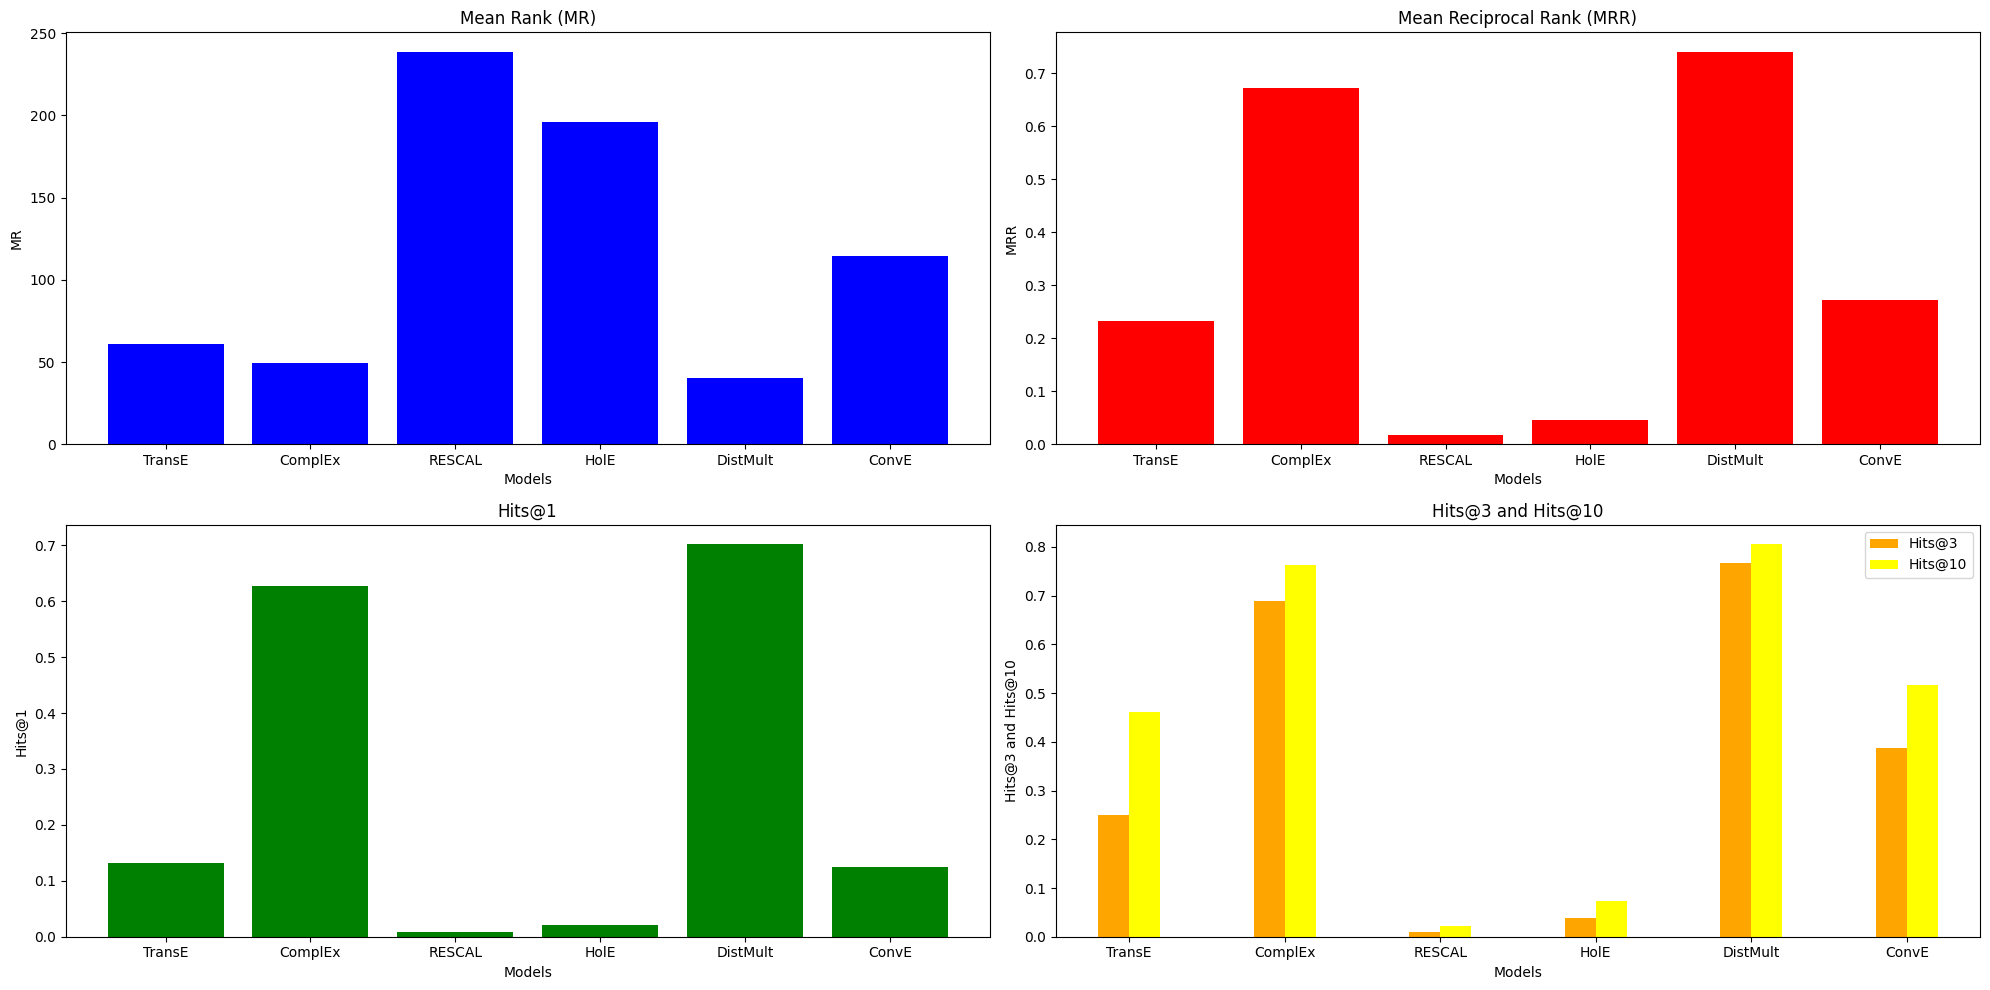

In [23]:
import matplotlib.pyplot as plt

models = ['TransE', 'ComplEx', 'RESCAL', 'HolE', 'DistMult', 'ConvE']


fig, ax = plt.subplots(2, 2, figsize=(20, 10))

# Mean Rank
ax[0, 0].bar(models, mr, color='blue')
ax[0, 0].set_title('Mean Rank (MR)')
ax[0, 0].set_xlabel('Models')
ax[0, 0].set_ylabel('MR')

# Mean Reciprocal Rank
ax[0, 1].bar(models, mrr, color='red')
ax[0, 1].set_title('Mean Reciprocal Rank (MRR)')
ax[0, 1].set_xlabel('Models')
ax[0, 1].set_ylabel('MRR')

# Hits@1
ax[1, 0].bar(models, hits_1, color='green')
ax[1, 0].set_title('Hits@1')
ax[1, 0].set_xlabel('Models')
ax[1, 0].set_ylabel('Hits@1')

# Hits@3 and Hits@10 - Adjusted for overlapping bars
# Note: Adjusting the position for clear visualization
positions = range(len(models))  # Positions for the models
width = 0.2  # Width of the bars

# Plotting Hits@3 and Hits@10 with adjusted positions for clarity
ax[1, 1].bar([p - width/2 for p in positions], hits_3, width=width, color='orange', label='Hits@3')
ax[1, 1].bar([p + width/2 for p in positions], hits_10, width=width, color='yellow', label='Hits@10')

ax[1, 1].set_title('Hits@3 and Hits@10')
ax[1, 1].set_xlabel('Models')
ax[1, 1].set_ylabel('Hits@3 and Hits@10')
ax[1, 1].legend()
ax[1, 1].set_xticks(positions)
ax[1, 1].set_xticklabels(models)

plt.tight_layout()
plt.show()

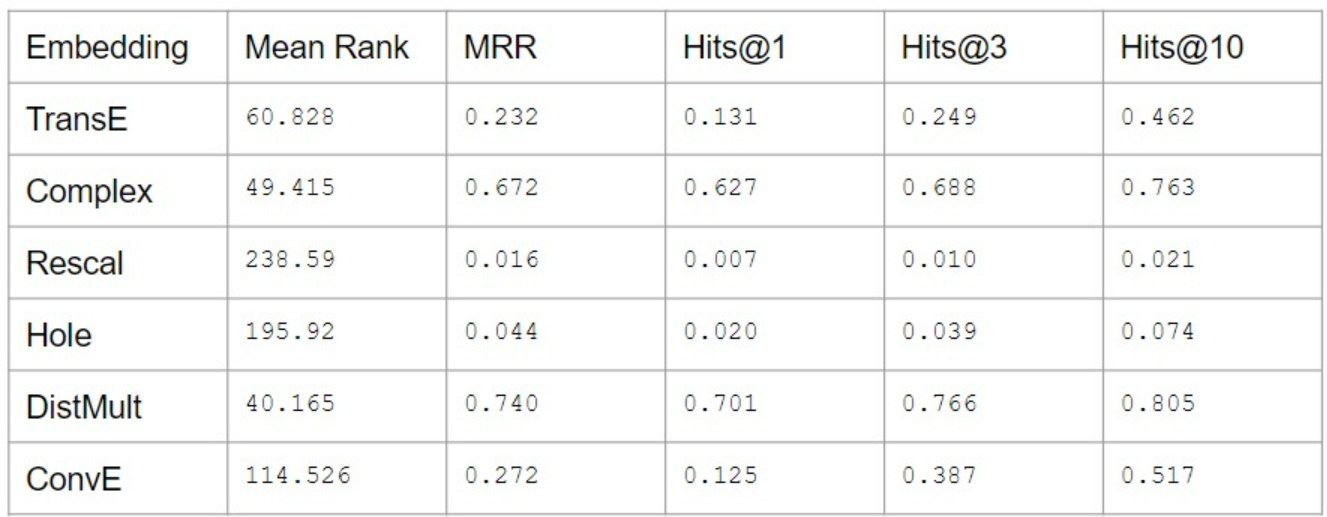